# **ANÁLISIS DE RESERVAS HOTELERAS**

En el presente proyecto se analizará una base de datos con información
correspondiente a Reservas Hoteleras realizadas por diferentes usuarios de todo el mundo durante los años 2015-2017. Esta base de datos es una recopilación de información que considera aspectos como el tipo de hotel elegido y las diferentes preferencias de los huéspedes (por ejemplo, la cantidad de adultos y niños, cantidad de noches y precio de las mismas, etc.). Además, tiene información adicional sobre si las reservas realizadas fueron confirmadas o canceladas, y las condiciones de dicha reserva (con cuánto tiempo de anticipación fue efectuada, si requirió algún tipo de depósito, el medio por el cual fue realizada, etc.). De este modo, esta información permite un análisis a varios niveles: desde el estudio de las preferencias de los huéspedes y tendencias de las reservas, hasta el
estudio de la tasa de cancelación y condiciones de las mismas.

## **CONTEXTO**

El análisis de cancelaciones de reservas de hotel es un tema fundamental para los gestores hoteleros. Las cancelaciones representan pérdidas económicas y afectan la eficiencia operativa, como la planificación de ocupaciones y recursos. Este análisis fue realizado a partir de una base de datos de reservas y cancelaciones durante los años 2015-2017.
La industria hotelera necesita comprender qué factores influyen en las cancelaciones para tomar decisiones informadas sobre políticas de reserva, ofertas de última hora, y estrategias de gestión de ingresos.

## **AUDIENCIA**


Este análisis está dirigido a gestores hoteleros, profesionales del marketing en la industria turística, y analistas de datos en el sector hotelero. Ellos podrán usar los insights obtenidos para mejorar la gestión de reservas y optimizar sus operaciones frente a cancelaciones.

## **PREGUNTAS DE INTERÉS**



1. ¿Qué características del cliente están más relacionadas con las cancelaciones?

2. ¿Qué impacto tiene el lead time (tiempo de antelación de la reserva) en la probabilidad de cancelación?

3. ¿Existen patrones de estacionalidad o diferencias según el tipo de hotel que afectan las cancelaciones?

# Extracción de datos desde APIs con credenciales (en este caso KAGGLE)

In [1]:
# Paso (1) extraigo mi credencial
! pip install -q kaggle
#https://drive.google.com/file/d/1DUOYQqCZS4ZjtEG4fQFZPKKGePFPoYIg/view?usp=sharing De este enlace me interesa el ID, lo que viene despues del /d/
! gdown --id 1DUOYQqCZS4ZjtEG4fQFZPKKGePFPoYIg # Acá coloco mi ID personal (el de arriba)

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1DUOYQqCZS4ZjtEG4fQFZPKKGePFPoYIg
To: /content/kaggle.json
100% 76.0/76.0 [00:00<00:00, 278kB/s]


In [2]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json #con estas lineas verifico la correcta conexión
! kaggle datasets list ##listado de los datasets de Kaggle para verificar la correcta conexión

ref                                                          title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
valakhorasani/mobile-device-usage-and-user-behavior-dataset  Mobile Device Usage and User Behavior Dataset   11KB  2024-09-28 20:21:12          11888        232  1.0              
arslaan5/explore-car-performance-fuel-efficiency-data        Explore Car Performance: Fuel Efficiency Data    5KB  2024-10-17 16:35:59           1108         25  1.0              
hasibur013/diabetes-dataset                                  Diabetes Dataset                                 9KB  2024-10-22 02:10:36            894         27  1.0              
valakhorasani/gym-members-exercise-dataset                   Gym Members Exercise Dataset           

# Dataset de Reservas Hoteleras (Julio 2015- Agosto 2017)

In [3]:
!kaggle datasets download -d mojtaba142/hotel-booking #Descarga de la APIs del dataset desde Kaggle (agregar el signo de exclamación)


Dataset URL: https://www.kaggle.com/datasets/mojtaba142/hotel-booking
License(s): copyright-authors
  0% 0.00/4.40M [00:00<?, ?B/s]
100% 4.40M/4.40M [00:00<00:00, 54.1MB/s]


In [4]:
#Se descarga un zip, y hay que descomprimirlo
import pandas as pd
pd.set_option('display.max_rows', None)
!unzip /content/hotel-booking.zip

Archive:  /content/hotel-booking.zip
  inflating: hotel_booking.csv       


# Data Wrangling

Lectura del Dataset

In [5]:
df = pd.read_csv('/content/hotel_booking.csv')

Exploración del Dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Se observa una gran cantidad de valores nulos en las columnas "Agent" y "Company".

In [7]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


## Observación y tratamiento de valores DUPLICADOS

In [8]:
df.shape


(119390, 36)

In [9]:
df= df.drop_duplicates()
print(df.shape)

(119390, 36)


No se observaron valores duplicados.

## Análisis y tratamiento de valores nulos

In [10]:
df.isnull().values.any()

True

Cuáles son las columnas con mayor % de valores nulos?

In [11]:
# Columnas con porcentaje de nulos
pd.set_option('display.max_rows', None)  # or 1000
serie=(df.isnull().sum()/df.shape[0])*100
serie=serie.sort_values(ascending=False)
serie= serie[serie>0]
serie

,0
company,94.306893
agent,13.686238
country,0.408744
children,0.003350


In [12]:
pip install missingno

<Axes: >

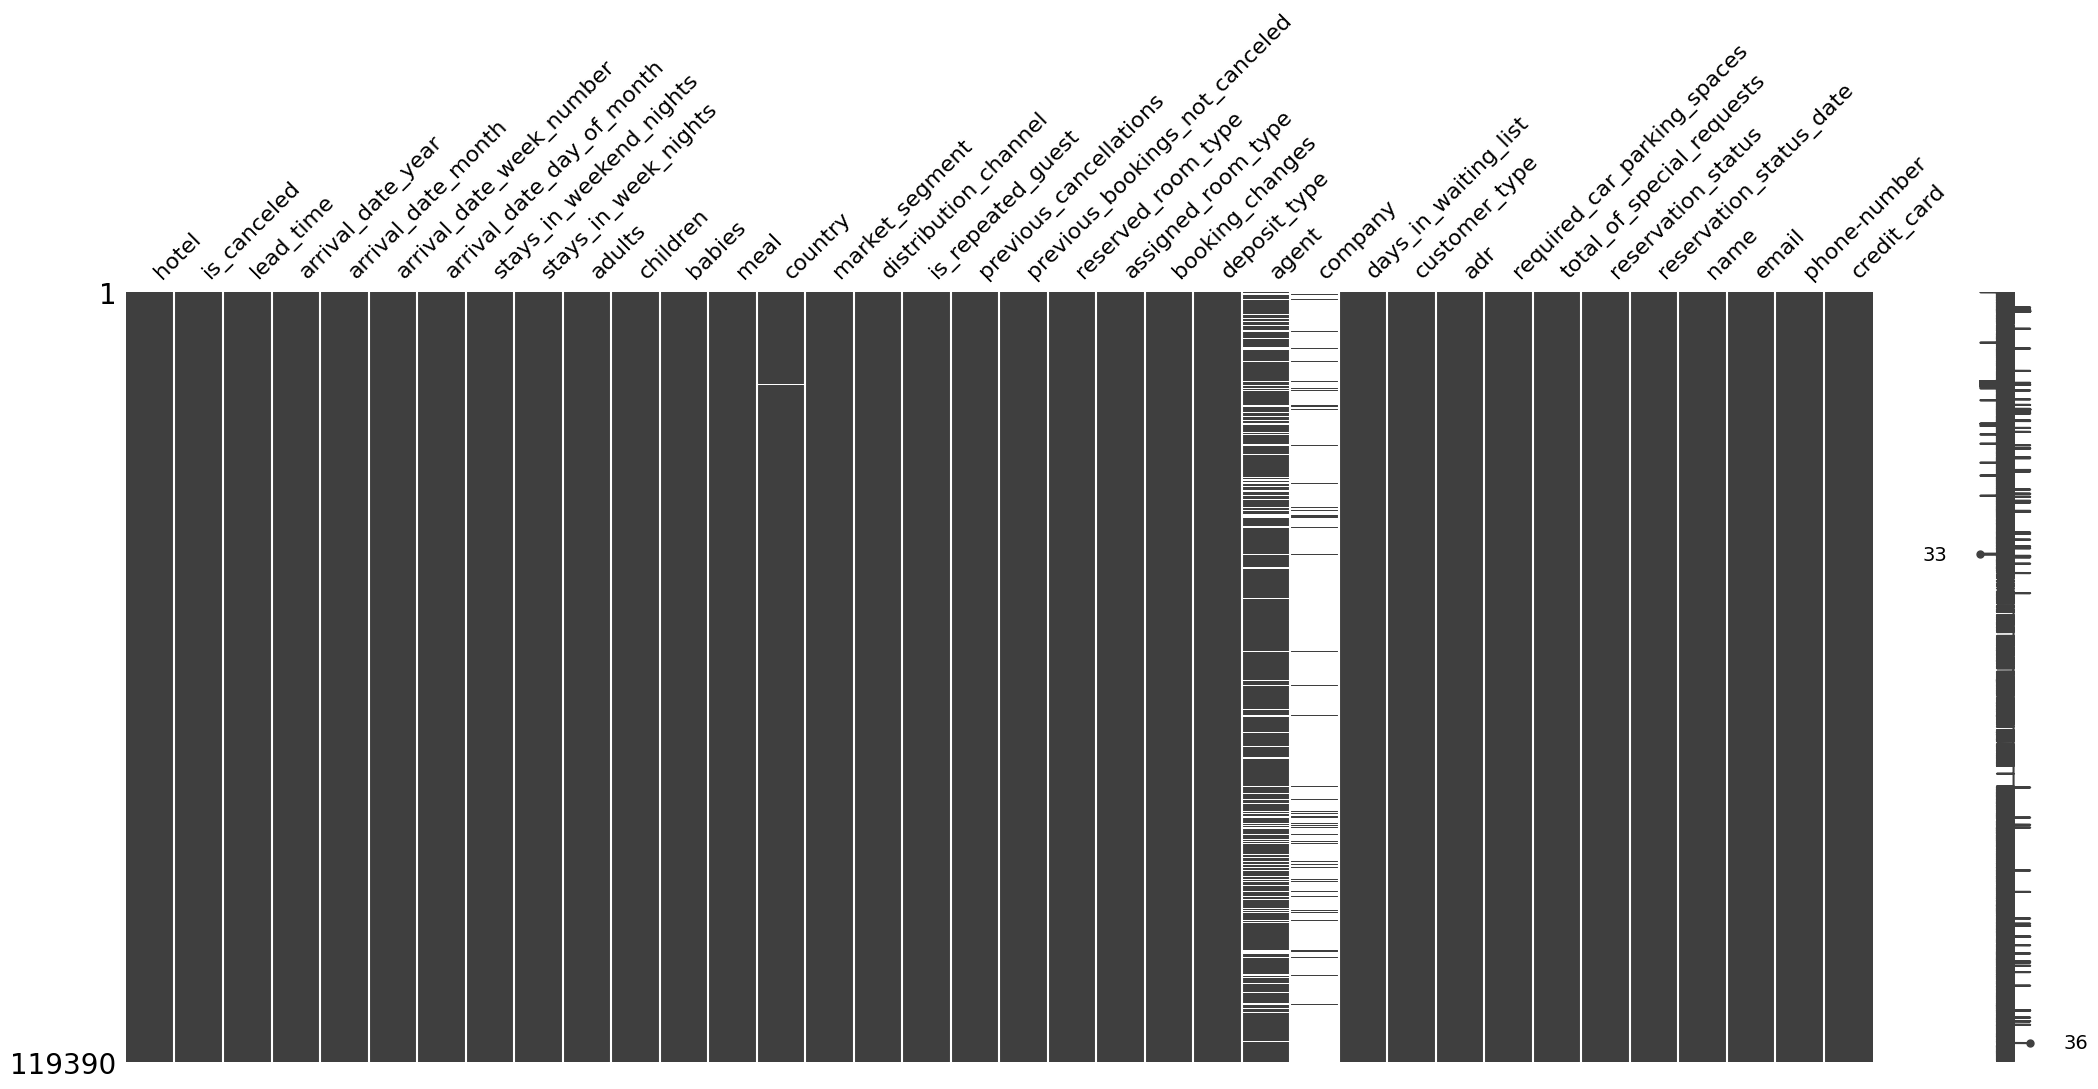

In [13]:
import missingno as msno
msno.matrix(df)

Como se observó previamente, existe un gran % de valores nulos en las columnas "Agent" y "Company". También se observa un pequeño % de valores nulos en la columna "Country". Se procederá de la siguiente manera:

-Se eliminarán las variables Agent y Company

-Se eliminarán otras variables que no son relevantes para el análisis, como: 'name', 'email', 'phone-number', 'credit_card'

-Se eliminarán las filas con valores nulos de la variable Country

In [14]:
col_del=['agent','company', 'name', 'email', 'phone-number', 'credit_card', 'reservation_status', 'reservation_status_date'] # Columnas a borrar que no aportan
df=df.drop(labels=col_del, axis=1) # Borrando las columnas en col_del
df.columns # Verificando las columnas que quedaron

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')

In [15]:
df = df.dropna(subset=['children', 'country'])

In [16]:
df.shape

(118898, 28)

Verificamos que no haya datos nulos

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118898 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118898 non-null  object 
 1   is_canceled                     118898 non-null  int64  
 2   lead_time                       118898 non-null  int64  
 3   arrival_date_year               118898 non-null  int64  
 4   arrival_date_month              118898 non-null  object 
 5   arrival_date_week_number        118898 non-null  int64  
 6   arrival_date_day_of_month       118898 non-null  int64  
 7   stays_in_weekend_nights         118898 non-null  int64  
 8   stays_in_week_nights            118898 non-null  int64  
 9   adults                          118898 non-null  int64  
 10  children                        118898 non-null  float64
 11  babies                          118898 non-null  int64  
 12  meal                 

## Data Cleaning

In [18]:
import numpy as np

Convertimos las columnas de fecha a ese formato usando pd.to_datetime

In [19]:
# Primero creamos una nueva columna combinada en formato de fecha
df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'].astype(str) + '-' + df['arrival_date_day_of_month'].astype(str), format='%Y-%B-%d')



In [20]:
#Luego verificamos que la columna creada 'arrival_date' es correcta
df[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month', 'arrival_date']].head()

,arrival_date_year,arrival_date_month,arrival_date_day_of_month,arrival_date
0,2015,July,1,2015-07-01
1,2015,July,1,2015-07-01
2,2015,July,1,2015-07-01
3,2015,July,1,2015-07-01
4,2015,July,1,2015-07-01


# Exploratory Data Analysis (EDA)

In [21]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
sns.set_style('darkgrid')
colors = sns.color_palette('muted')

In [22]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,arrival_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,C,3,No Deposit,0,Transient,0.0,0,0,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,C,4,No Deposit,0,Transient,0.0,0,0,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,A,C,0,No Deposit,0,Transient,75.0,0,0,2015-07-01
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,A,0,No Deposit,0,Transient,75.0,0,0,2015-07-01
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,A,0,No Deposit,0,Transient,98.0,0,1,2015-07-01


In [23]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
is_canceled,118898.0,0.371352,0.0,0.0,0.0,1.0,1.0,0.483168
lead_time,118898.0,104.311435,0.0,18.0,69.0,161.0,737.0,106.903309
arrival_date_year,118898.0,2016.157656,2015.0,2016.0,2016.0,2017.0,2017.0,0.707459
arrival_date_week_number,118898.0,27.166555,1.0,16.0,28.0,38.0,53.0,13.589971
arrival_date_day_of_month,118898.0,15.80088,1.0,8.0,16.0,23.0,31.0,8.780324
stays_in_weekend_nights,118898.0,0.928897,0.0,0.0,1.0,2.0,16.0,0.996216
stays_in_week_nights,118898.0,2.502145,0.0,1.0,2.0,3.0,41.0,1.900168
adults,118898.0,1.858391,0.0,2.0,2.0,2.0,55.0,0.578576
children,118898.0,0.104207,0.0,0.0,0.0,0.0,10.0,0.399172
babies,118898.0,0.007948,0.0,0.0,0.0,0.0,10.0,0.09738


## Cuál es la cantidad de reservas efectivas que tiene nuestra base de datos?

In [24]:
total_reservations = df[df['is_canceled'] == 0].groupby("arrival_date_year")['is_canceled'].count()
total_reservations

,is_canceled
arrival_date_year,
2015,13753
2016,36122
2017,24870


**De las reservas efectivas, 13854 fueron realizadas durante el 2015, 36370 durante el 2016 y 24942 durante el 2017.**

## De dónde son los huéspedes?

In [25]:
#Seleccionamos solo los 10 paises con mayor número de reservas
countries= df["country"].value_counts()
top10=countries.head(10)

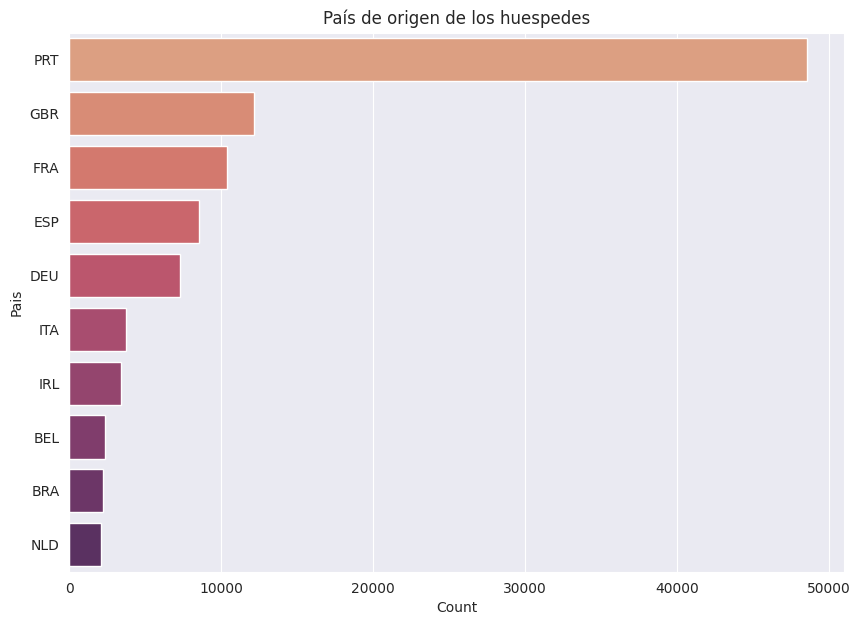

In [26]:
plt.figure(figsize=(10, 7))
sns.countplot(y='country', data=df, order=top10.index, palette= "flare")
plt.title('País de origen de los huespedes')
plt.xlabel('Count')
plt.ylabel('Pais')
plt.show()

**Se observa que los huespedes con más reservas son de Portugal.**

In [27]:
countries= df["country"].value_counts().to_frame('conteo')
countries['porcentual']= df["country"].value_counts(normalize=True)
countries['acumulado'] = countries['porcentual'].cumsum()
top10=countries.head(10)

## Cuál es el precio por noche por persona?

In [28]:
#Convertimos las variables en numéricas
df['adr'] = pd.to_numeric(df['adr'], errors='coerce')
df['children'] = pd.to_numeric(df['children'], errors='coerce')
df['adults'] = pd.to_numeric(df['adults'], errors='coerce')



In [29]:
# Calculamos la nueva columna 'precio_por_persona'
# Añadimos 1e-6 para evitar división por cero en caso de que children + adults sea cero
df['precio_por_persona'] = df['adr'] / (df['children'] + df['adults'] + 1e-6)

In [30]:
# Calculamos la nueva columna 'precio_por_persona'
df['precio_por_persona'] = df['adr'] / (df['children'] + df['adults'])

In [31]:
# Comprobamos que se hizo bien
df[['adr', 'children', 'adults', 'precio_por_persona']].sample(5)

,adr,children,adults,precio_por_persona
25535,148.17,2.0,2,37.042500
30619,48.50,1.0,2,16.166667
1198,172.55,0.0,2,86.275000
40578,72.50,0.0,1,72.500000
92461,92.29,0.0,2,46.145000


<Axes: xlabel='reserved_room_type', ylabel='precio_por_persona'>

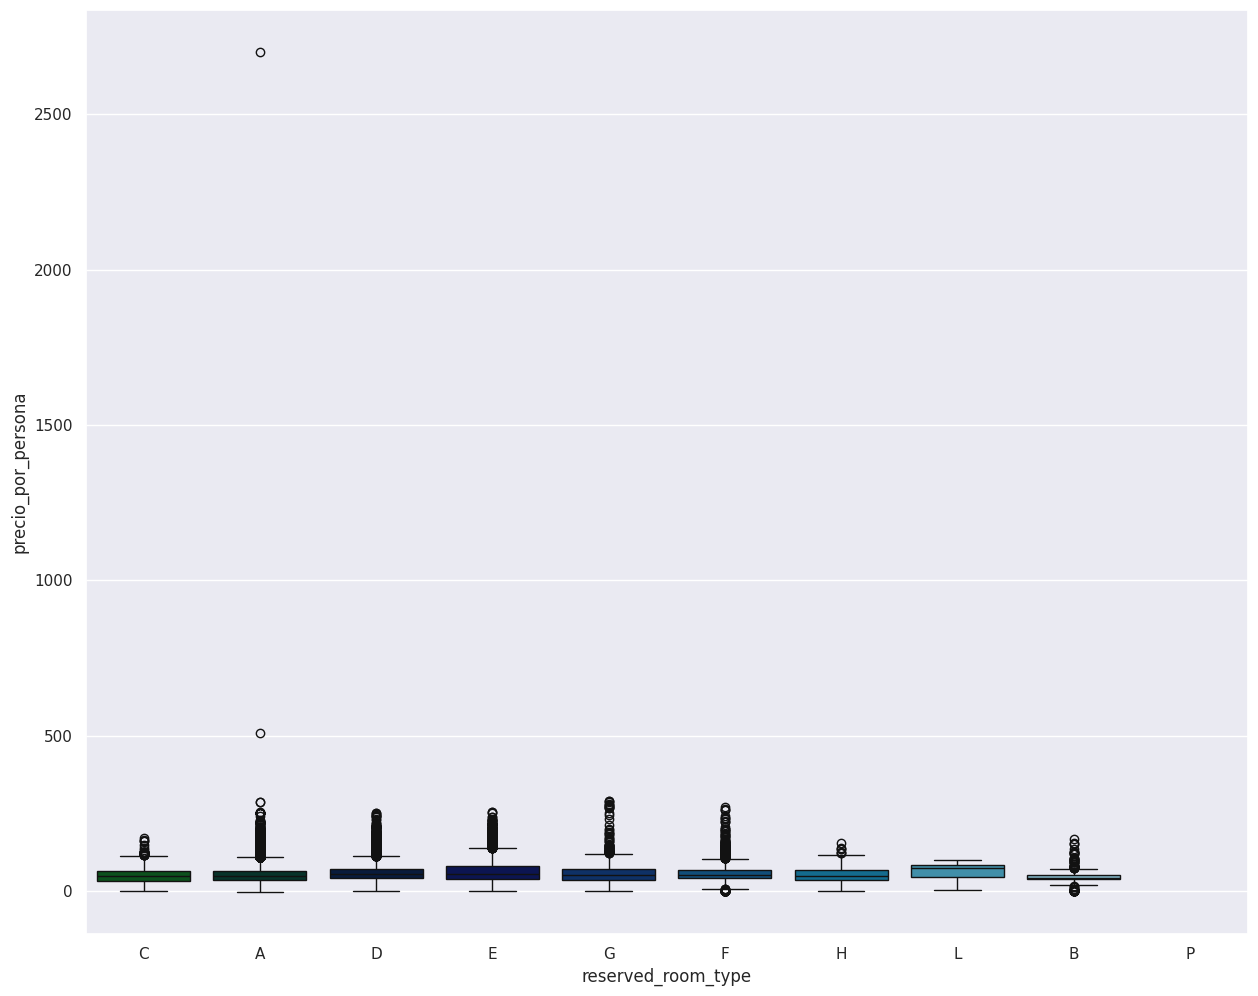

In [32]:
sns.set(rc={'figure.figsize':(15,12)})
sns.boxplot(x="reserved_room_type",y="precio_por_persona",data=df,palette="ocean")

**Se observa que la mayor cantidad de habitaciones tiene un valor inferior a 500 euros por noche por persona, con excepción de algunos valores atípicos en los precios de las habitaciones del tipo A. Se procederá a filtrar el dataset para no visualizar esos valores.**

In [33]:
# Nos quedamos con las filas donde 'precio_por_persona' es menor a 500
df= df[df['precio_por_persona'] < 500]

Graficamos nuevamente

<Axes: xlabel='reserved_room_type', ylabel='precio_por_persona'>

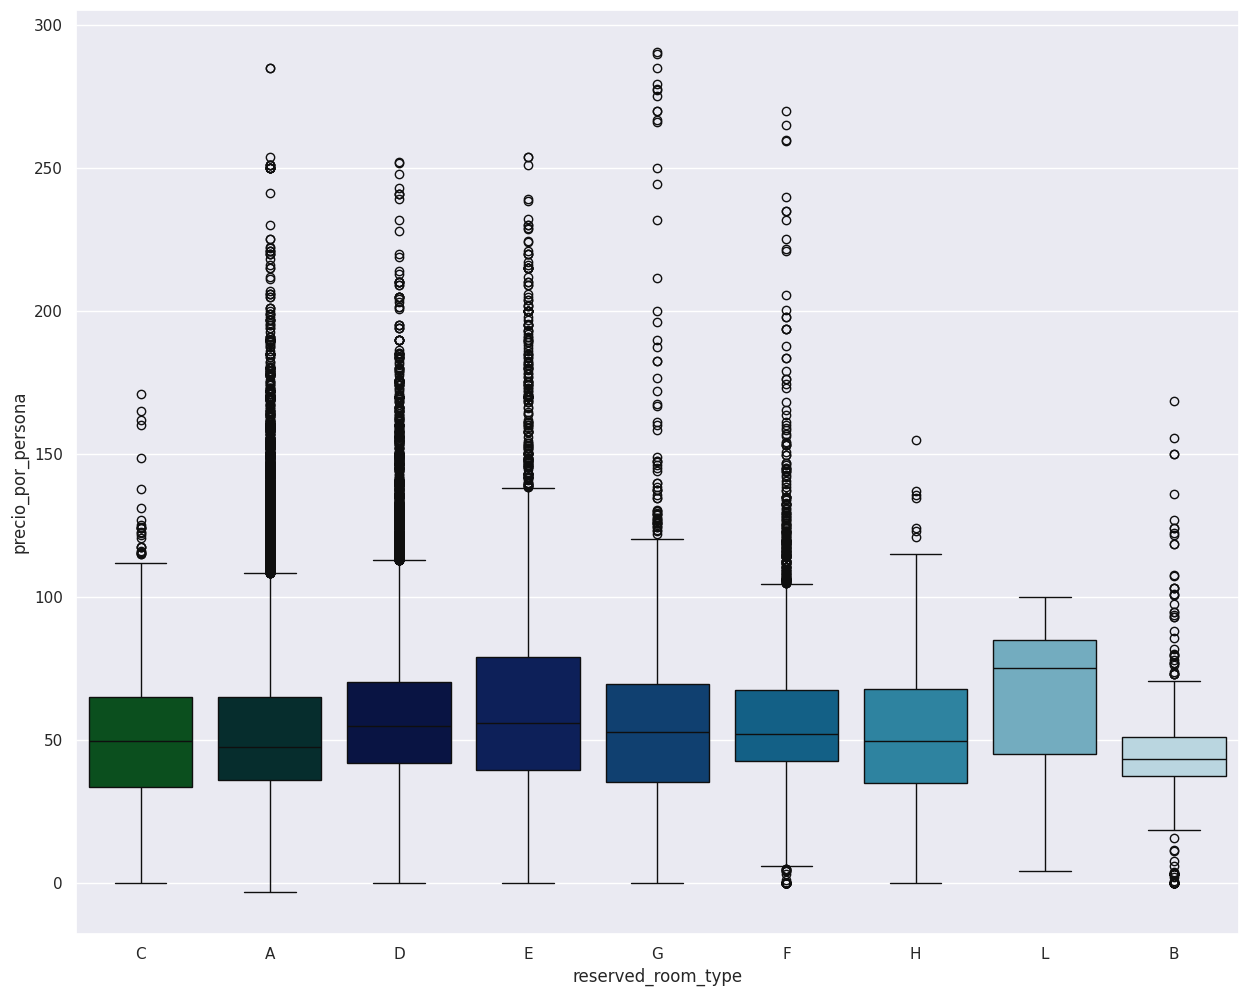

In [34]:
sns.set(rc={'figure.figsize':(15,12)})
sns.boxplot(x="reserved_room_type",y="precio_por_persona",data=df,palette="ocean")

**Hay una gran variabilidad en los precios por persona por noche de las habitaciones, sin embargo estos son relativamente similares a excepcion de las habitaciones del tipo 'L' cuya media es un poco más elevada**

Veamos cómo es ese precio según el tipo de hotel elegido:

[(0.0, 200.0)]

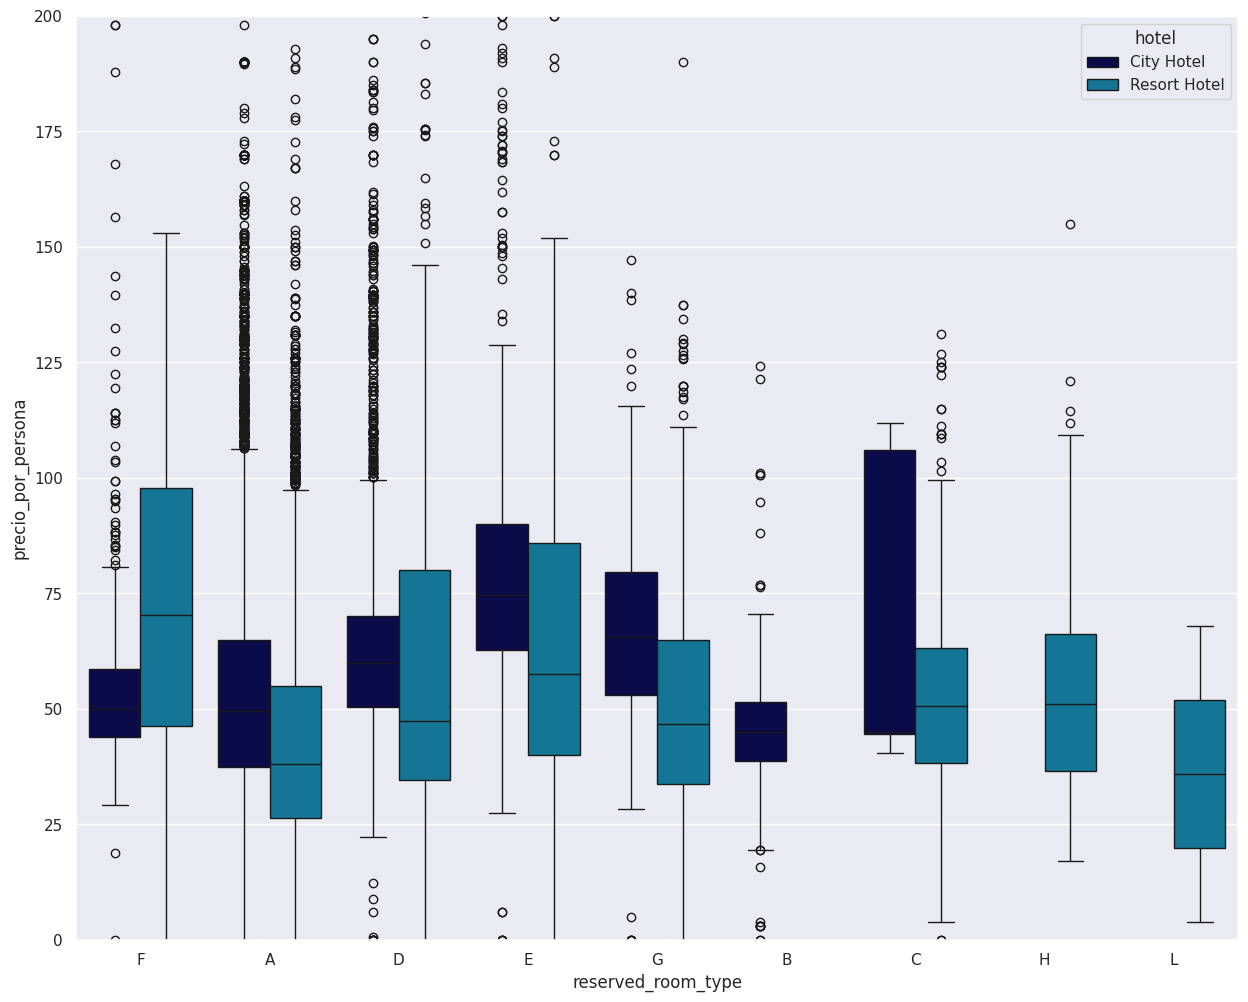

In [35]:
sns.set(rc={'figure.figsize':(15,12)})
sns.boxplot(x="reserved_room_type",y="precio_por_persona", hue="hotel",data=df[(df["is_canceled"]!=0)].sort_values("hotel"),palette="ocean").set(ylim=(0, 200))


**En promedio, el valor de las habitaciones en un hotel en la ciudad es un poco más caro que el mismo tipo de habitación en un hotel resort.**

## Cómo varia el precio por noche a lo largo del año?

In [36]:
months=["January", "February", "March", "April", "May", "June",
          "July", "August", "September", "October", "November", "December"]

<Axes: xlabel='arrival_date_month', ylabel='precio_por_persona'>

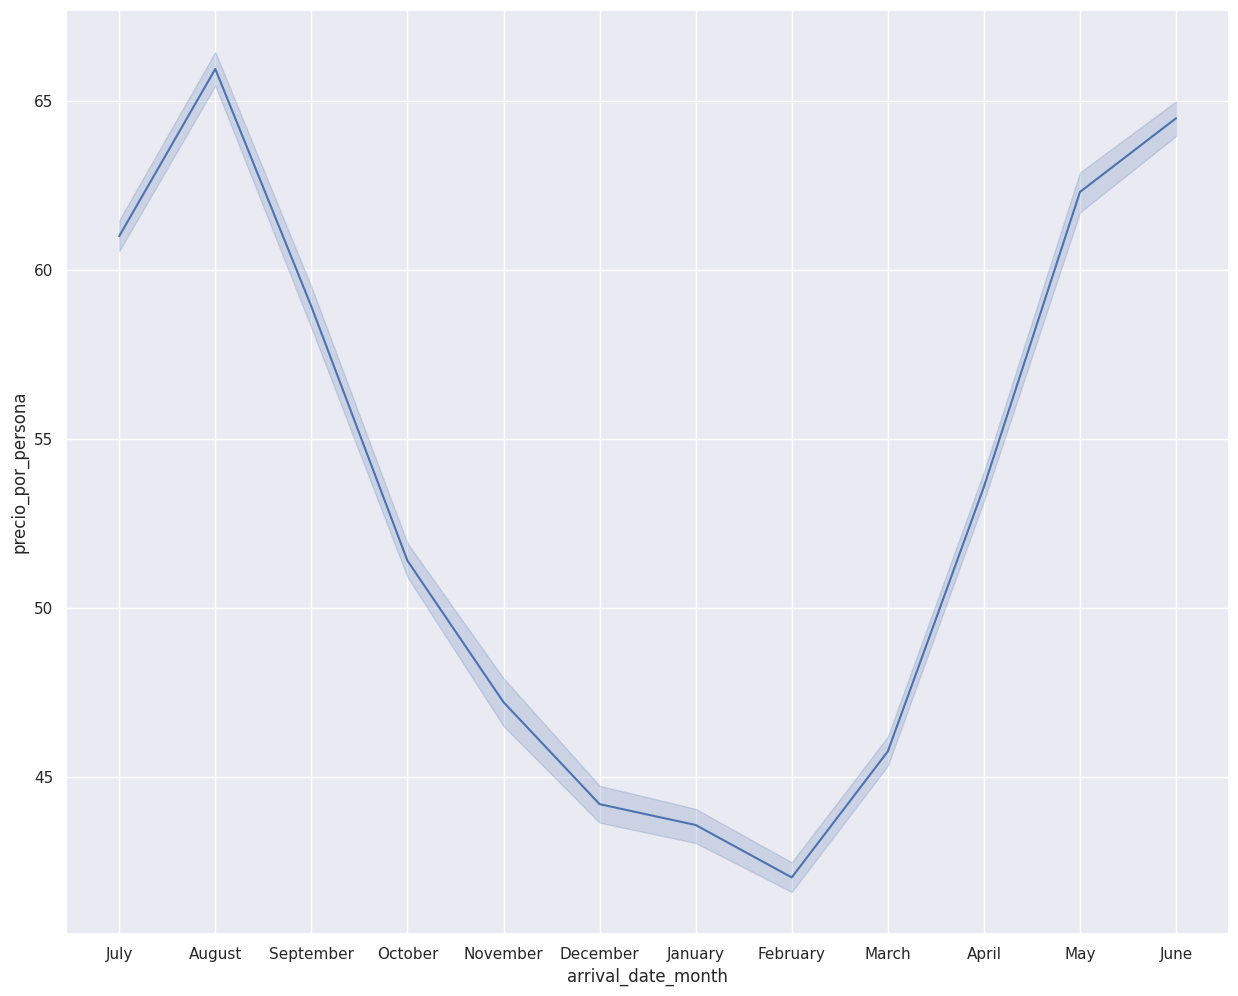

In [37]:
sns.lineplot(x="arrival_date_month",y="precio_por_persona",data=df,markers=True)

**Los precios más altos son durante el mes de AGOSTO mientras que los precios más bajos son durante el mes de FEBRERO.**

## Cómo varía la cantidad de huespedes a lo largo del año?

In [38]:
# 1. Creamos una columna que sume la cantidad de huéspedes
df['total_huespedes'] = df['children'] + df['adults']

In [39]:
# Verificamos el resultado
df[['children', 'adults', 'total_huespedes']].head()

,children,adults,total_huespedes
0,0.0,2,2.0
1,0.0,2,2.0
2,0.0,1,1.0
3,0.0,1,1.0
4,0.0,2,2.0


In [40]:
# 2. Extraemos el mes y el año de la columna 'arrival_date'
df['month'] = df['arrival_date'].dt.month
df['year'] = df['arrival_date'].dt.year

# Agrupamos por año y mes y sumar la cantidad de huéspedes
resumen_mensual = df.groupby(['year', 'month'])['total_huespedes'].sum().reset_index()

# Creamos una columna de fecha para facilitar la visualización
resumen_mensual['fecha'] = pd.to_datetime(resumen_mensual[['year', 'month']].assign(day=1))

# Verificamos el resultado
resumen_mensual

,year,month,total_huespedes,fecha
0,2015,7,5668.0,2015-07-01
1,2015,8,7938.0,2015-08-01
2,2015,9,9642.0,2015-09-01
3,2015,10,8992.0,2015-10-01
4,2015,11,3764.0,2015-11-01
5,2015,12,5398.0,2015-12-01
6,2016,1,3773.0,2016-01-01
7,2016,2,7144.0,2016-02-01
8,2016,3,9180.0,2016-03-01
9,2016,4,10419.0,2016-04-01


De esta tabla se obtiene información interesante acerca de nuestra base de datos , por ejemplo:

1) No se cuenta con información previa a Julio del 2015.

2) 2016 es el único año con la información completa de los huespedes de todos los meses.

3) No se cuenta con información posterior a agosto del 2017.

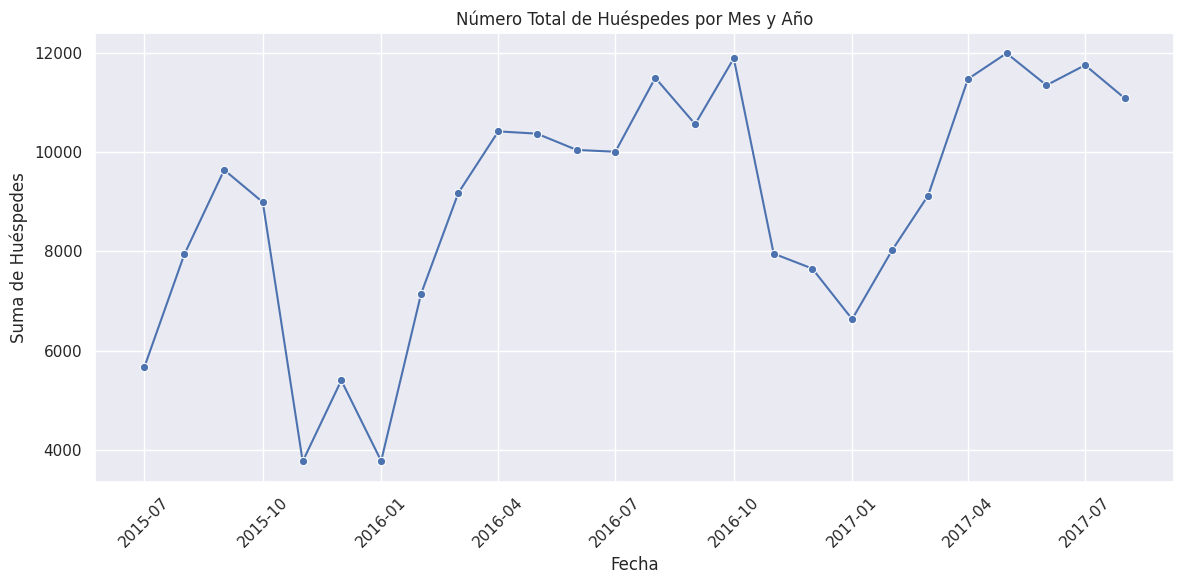

In [41]:
# Configuramos el tamaño de la figura
plt.figure(figsize=(12, 6))

# Creamos el gráfico de líneas usando seaborn
sns.lineplot(data=resumen_mensual, x='fecha', y='total_huespedes', marker='o', color='b')
plt.title('Número Total de Huéspedes por Mes y Año')
plt.xlabel('Fecha')
plt.ylabel('Suma de Huéspedes')
plt.grid(True)
plt.xticks(rotation=45)  # Opcional: rotamos las etiquetas del eje x para mejor legibilidad
plt.tight_layout()  # Ajustamos el diseño para que todo se vea bien
plt.show()

**Se observa que la mayor cantidad de huéspedes fue entre los meses de abril y octubre del 2016. Por el contrario, la menor cantidad de huéspedes fue entre los meses de octubre de 2015 y enero del 2016.**

Observemos entonces la cantidad de huéspedes por mes sin discriminar el año:

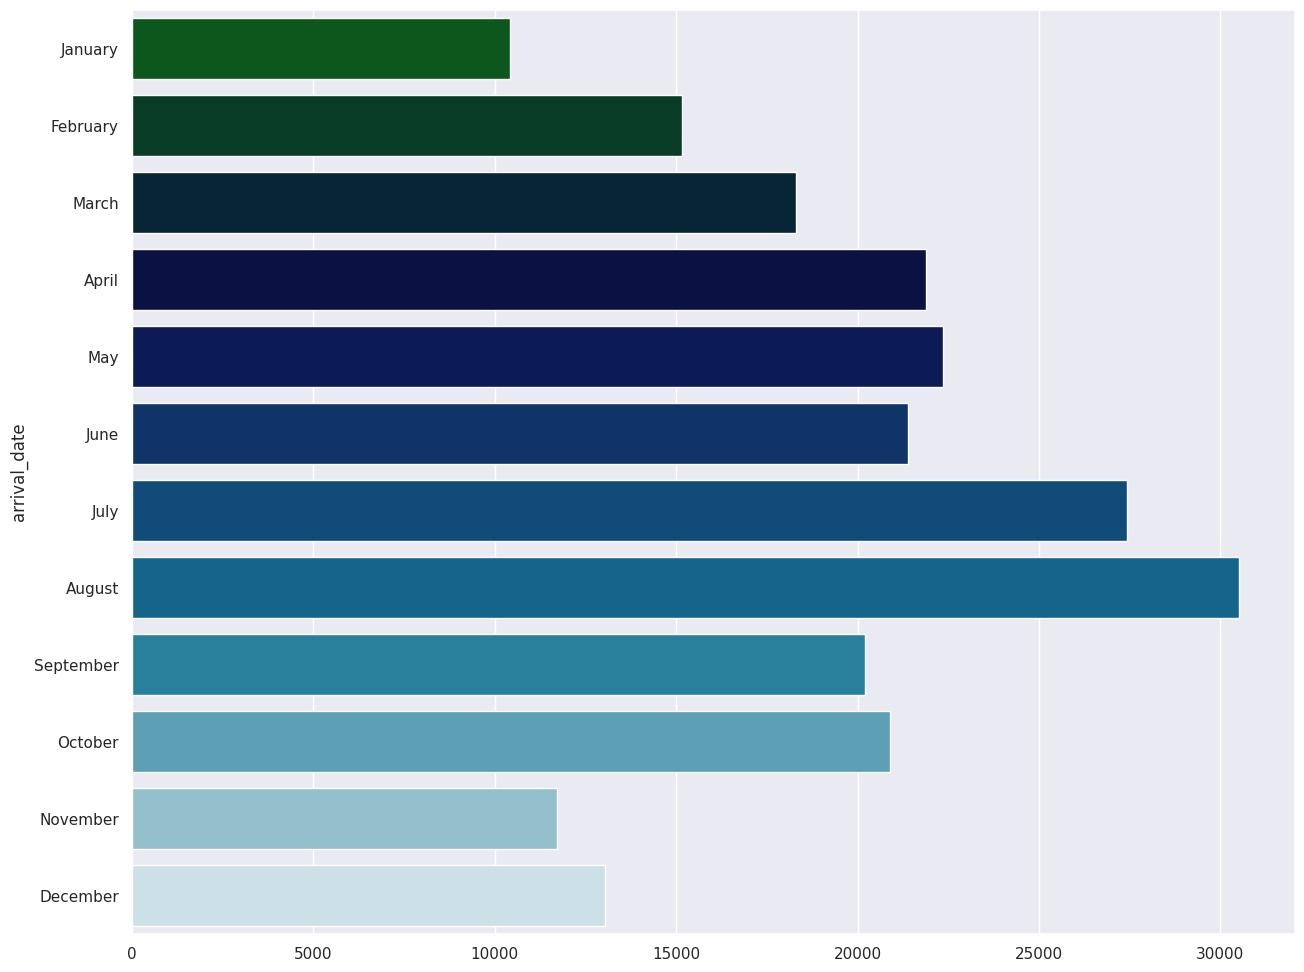

In [42]:
# Calculamos el N total de huespedes por mes
perMonth = df.groupby(df['arrival_date'].dt.month_name())['total_huespedes'].sum()

# Graficamos
sns.barplot(
    x=perMonth.values,
    y=perMonth.keys(),
    order=[
        "January",
        "February",
        "March",
        "April",
        "May",
        "June",
        "July",
        "August",
        "September",
        "October",
        "November",
        "December",
    ],
    palette="ocean",
)
plt.show()

**Julio y Agosto son los meses con mayor cantidad de huespedes.**

# Análisis de las cancelaciones

## Cuál es la cantidad de reservas efectivas vs reservas canceladas?

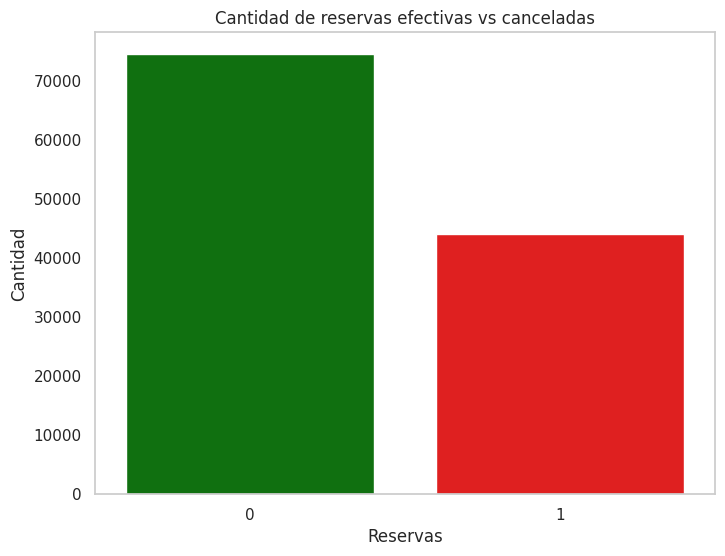

In [43]:
fig = plt.figure(figsize=(8, 6))
sns.set_style("whitegrid", {'grid.color': 'white'})
custom_colors = ['green', 'red']  # Verde para no canceladas, rojo para canceladas
ax = sns.countplot(x="is_canceled", data=df, palette=custom_colors, legend=True)
plt.title('Cantidad de reservas efectivas vs canceladas')
plt.xlabel('Reservas')
plt.ylabel('Cantidad')
plt.show()

**Se observa que la cantidad de reservas canceladas alcanza más del 50% respecto a la cantidad de reservas efectivas.**

## Cuántas reservas canceladas por año hubieron?

In [44]:
total_cancelations = df.groupby("arrival_date_month")["is_canceled"].sum()
total_cancelations

,is_canceled
arrival_date_month,
April,4510
August,5232
December,2363
February,2693
January,1805
July,4731
June,4533
March,3146
May,4677


## Cuál es la tasa de cancelación por mes?

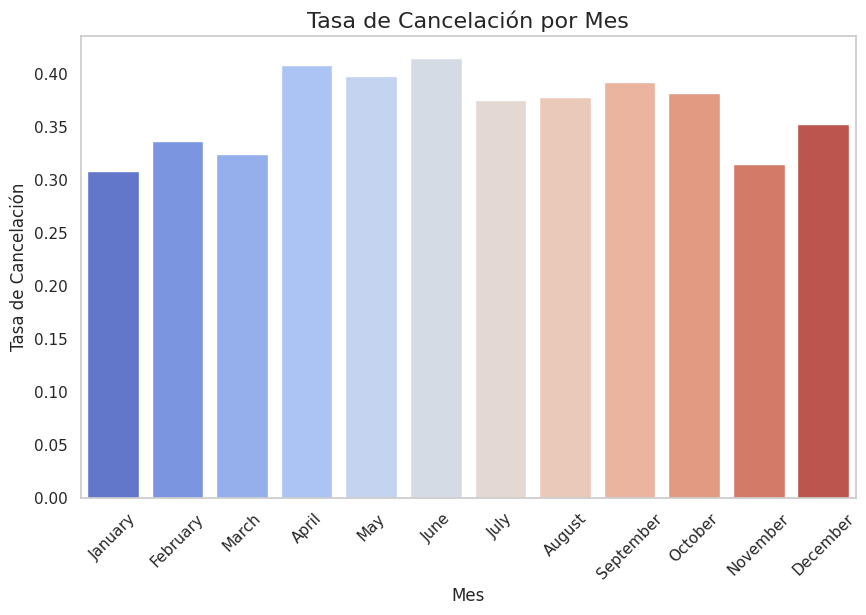

In [45]:
# Agrupamos por mes y sumamos las cancelaciones
total_cancelations = df.groupby("arrival_date_month")["is_canceled"].mean()

# Reordenamos los meses
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]

# Reindexamos para que los meses estén en el orden correcto
total_cancelations = total_cancelations.reindex(month_order)


plt.figure(figsize=(10, 6))
sns.barplot(x=total_cancelations.index, y=total_cancelations.values, palette="coolwarm")
plt.title('Tasa de Cancelación por Mes', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Tasa de Cancelación', fontsize=12)
plt.xticks(rotation=45) #rotamos etiquetas
plt.show()


**La mayor cantidad de cancelaciones se dan entre los meses de abril y octubre.**

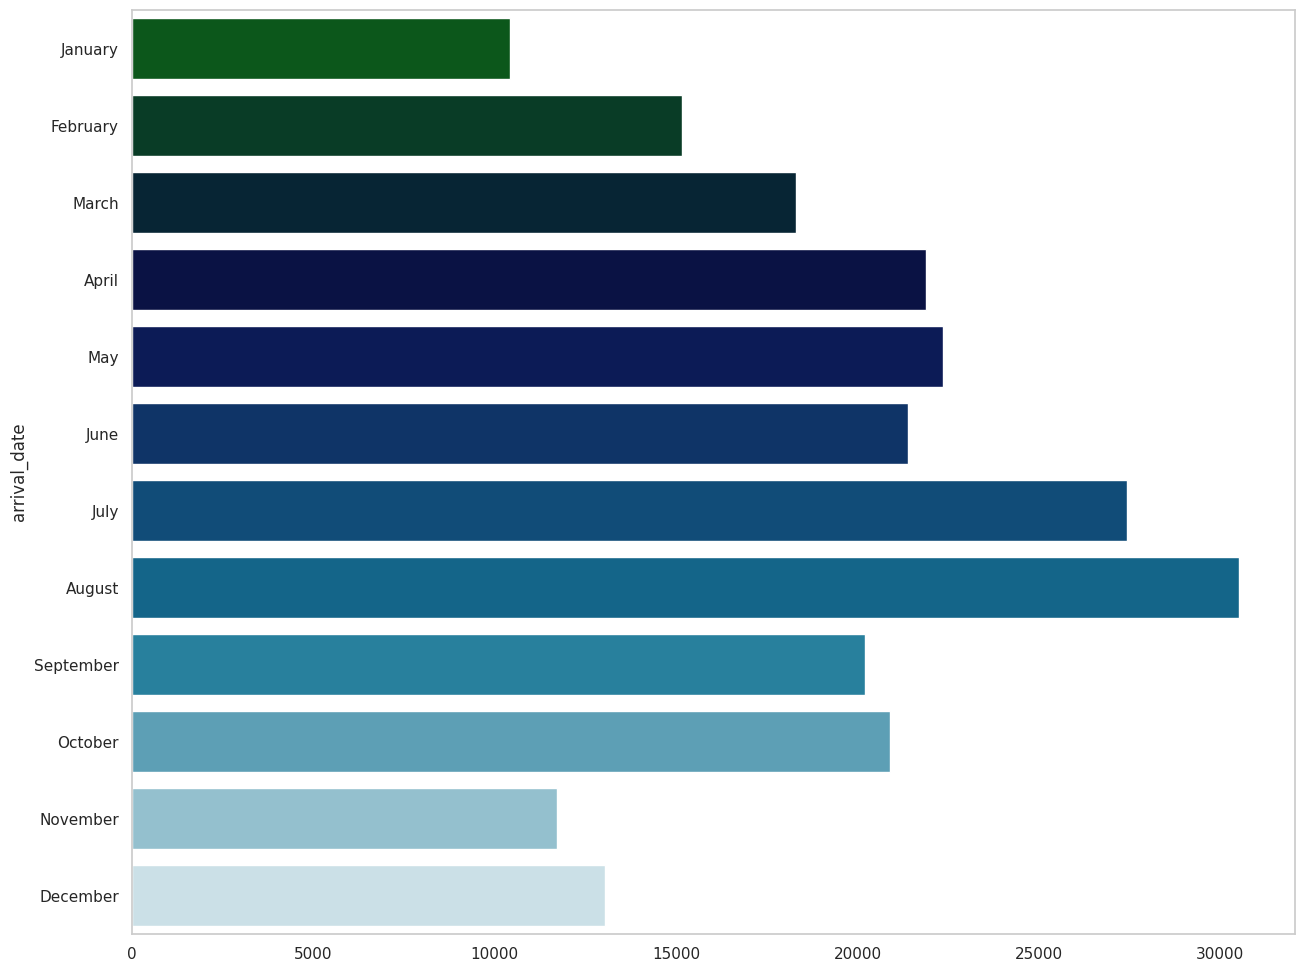

In [46]:
# Calculamos el N total de huespedes por mes
perMonth = df.groupby(df['arrival_date'].dt.month_name())['total_huespedes'].sum()

# Graficamos
sns.barplot(
    x=perMonth.values,
    y=perMonth.keys(),
    order=[
        "January",
        "February",
        "March",
        "April",
        "May",
        "June",
        "July",
        "August",
        "September",
        "October",
        "November",
        "December",
    ],
    palette="ocean",
)
plt.show()

**La mayor cantidad de huespedes también se da entre los meses de abril y octubre.**

## Análisis de Correlación

In [49]:
#Hagamos un HeatMap del df
!pip install plotly
import plotly.express as px
# Seleccionamos solo las variables numericas
numeric_df = df.select_dtypes(include=['number'])

correlacion = numeric_df.corr(method="spearman")
fig_heatmap = px.imshow(correlacion,
                        text_auto=True,
                        title='Heatmap for the Dataset')
fig_heatmap.update_layout(width=1000, height=800, title_font_size=20)
fig_heatmap.show()

## ¿Qué características del cliente están más relacionadas con las cancelaciones?

*Hipótesis: Las reservas con más clientes transitorios tienden a cancelar más a menudo.*

**CANCELACIONES VS TIPO DE CLIENTE:**

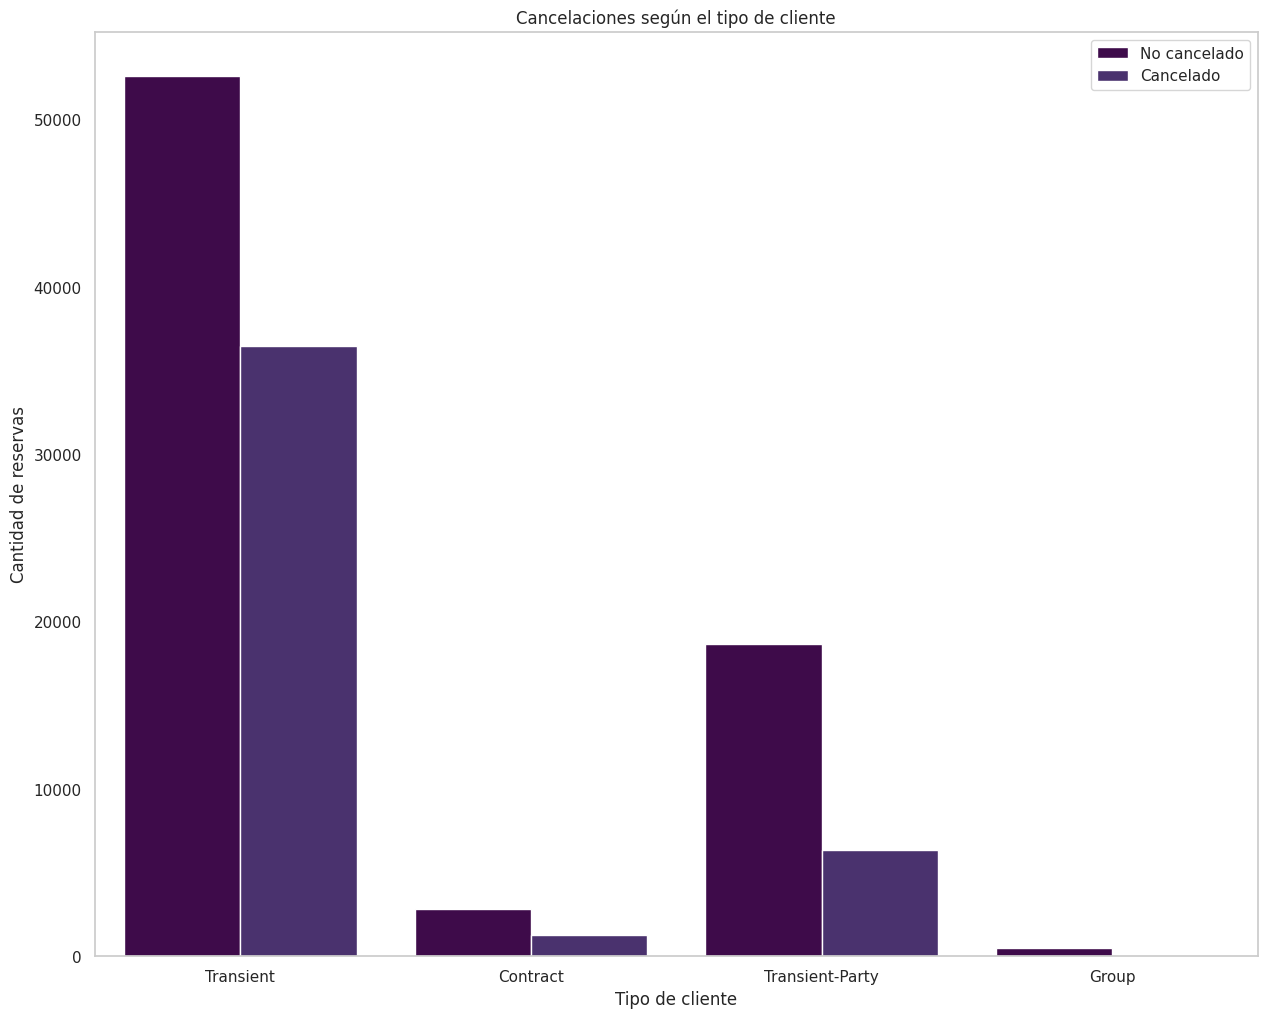

In [50]:
# Gráfico de barras para cancelaciones por tipo de cliente
sns.countplot(x='customer_type', hue='is_canceled', data=df, palette=px.colors.sequential.Viridis)
plt.title('Cancelaciones según el tipo de cliente')
plt.xlabel('Tipo de cliente')
plt.ylabel('Cantidad de reservas')
plt.legend(['No cancelado', 'Cancelado'])
plt.show()

**La mayor cantidad de cancelaciones se da por parte de aquellos huespedes transitorios, es decir, huéspedes que llegan sin cita previa, que reservan en el último momento o que necesitan una estancia de muy corta duración en su establecimiento**

Análisis estadístico:

In [51]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['customer_type'], df['is_canceled'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-cuadrado para 'customer_type': {chi2}, p-valor: {p}")


Chi-cuadrado para 'customer_type': 2260.0250674463687, p-valor: 0.0


**El tipo de cliente está asociado con la probabilidad de cancelación de la reserva, siendo los clientes transitorios lo más propensos a cancelar las mismas.**

**Se recomiendan estrategias de fidelización de clientes.**

**CANCELACIONES VS NÚMERO DE HUESPEDES:**

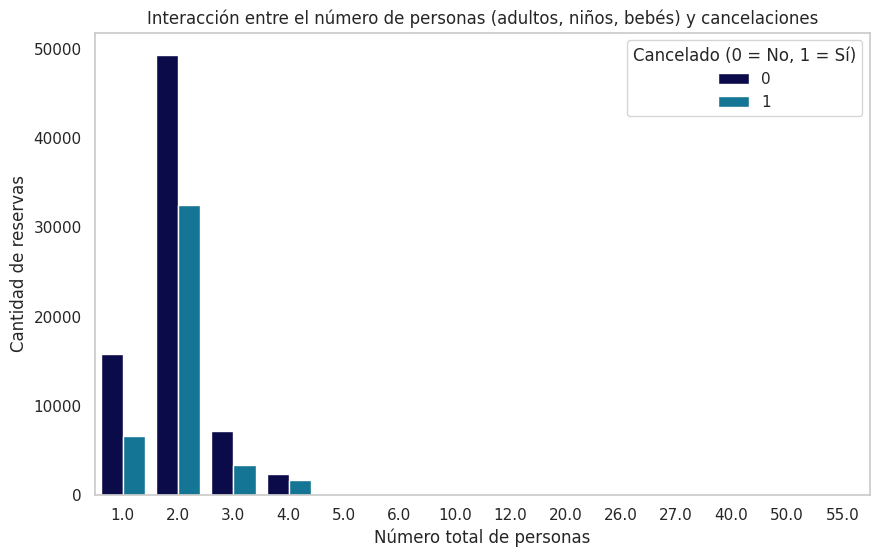

In [52]:
# Creamos una nueva columna que suma el número total de personas por reserva
df['total_people'] = df['adults'] + df['children'] + df['babies']

# Gráfico de barras para ver la relación entre el número total de personas y las cancelaciones
plt.figure(figsize=(10, 6))
sns.countplot(x='total_people', hue='is_canceled', data=df, palette='ocean')
plt.title('Interacción entre el número de personas (adultos, niños, bebés) y cancelaciones')
plt.xlabel('Número total de personas')
plt.ylabel('Cantidad de reservas')
plt.legend(title='Cancelado (0 = No, 1 = Sí)')
plt.show()

**Aquellos clientes que reservan en grupo raramente cancelan, mientras que los clientes con mayor probabilidad de cancelación son los que reservan de a 2.**

## ¿Existen patrones de estacionalidad o diferencias según el tipo de hotel que afectan las cancelaciones?



*Hipótesis: Los hoteles de ciudad y ciertos meses del año presentan tasas más altas de cancelación.*

**CANCELACIONES VS TIPO DE HOTEL:**

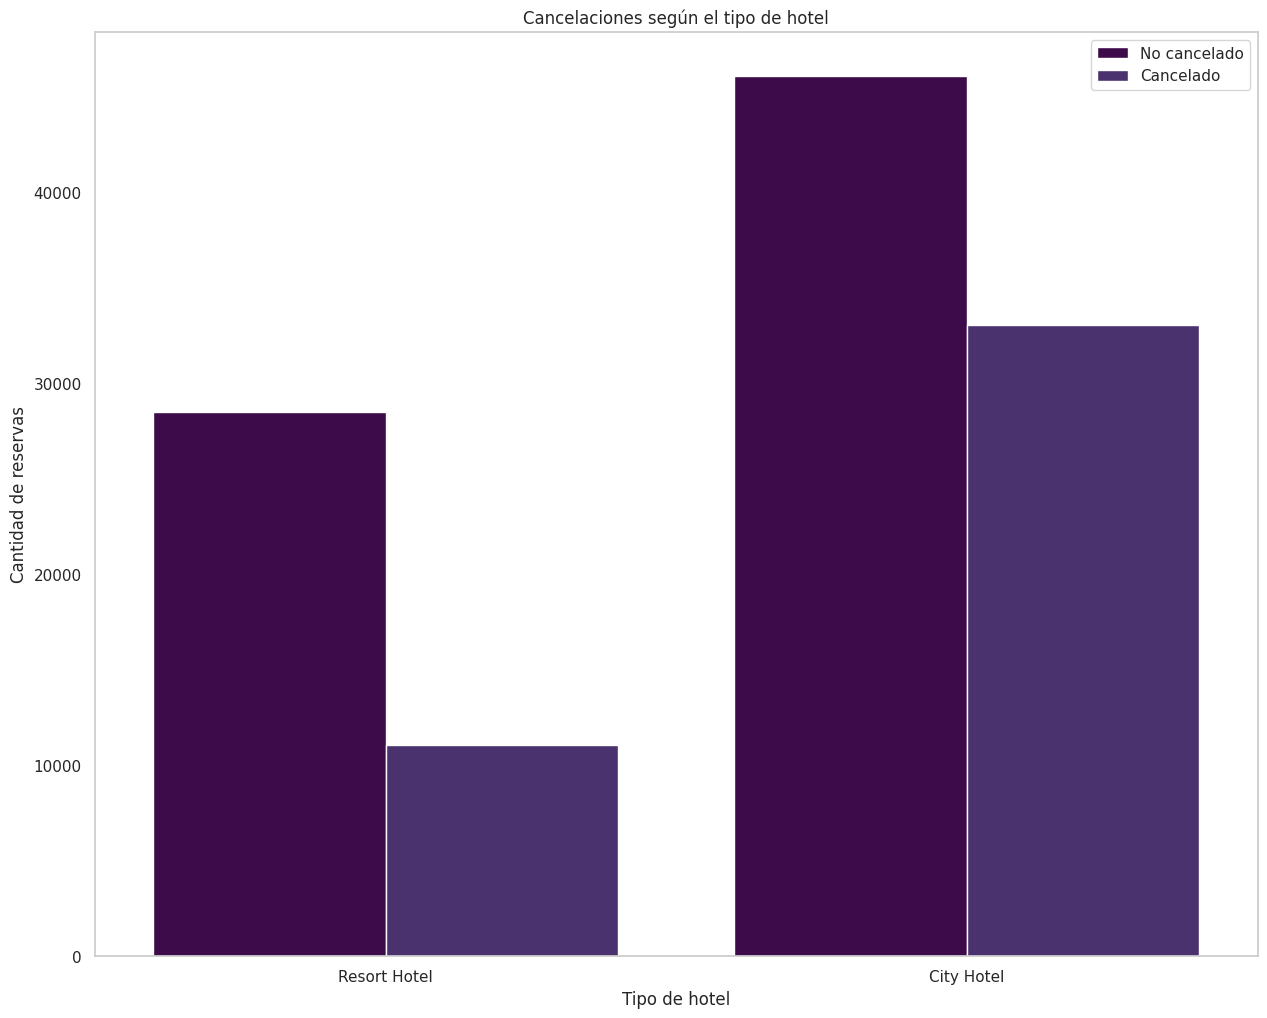

In [53]:
# Gráfico de barras para cancelaciones por tipo de hotel
sns.countplot(x='hotel', hue='is_canceled', data=df, palette=px.colors.sequential.Viridis)
plt.title('Cancelaciones según el tipo de hotel')
plt.xlabel('Tipo de hotel')
plt.ylabel('Cantidad de reservas')
plt.legend(['No cancelado', 'Cancelado'])
plt.show()

In [54]:
pd.crosstab(df['hotel'], df['is_canceled'], normalize='index') * 100

is_canceled,0,1
hotel,,
City Hotel,58.226457,41.773543
Resort Hotel,72.017178,27.982822


**Las reservas en hoteles de la ciudad son más probables de ser canceladas con respecto a las reservas en hoteles fuera de ella.**

Análisis estadístico: coeficiente Phi. Este coeficiente es una medida de asociación entre dos variables categóricas dicotómicas.

In [55]:
import pandas as pd
from scipy.stats import chi2_contingency

# Supongamos que tu dataframe se llama 'df' y las variables son dicotómicas
# Crear una tabla de contingencia 2x2
contingency_table = pd.crosstab(df['is_canceled'], df['hotel'])

# Asegúrate de que la tabla de contingencia es 2x2
if contingency_table.shape == (2, 2):
    # Realizar el test Chi-Cuadrado
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Calcular el coeficiente Phi
    n = contingency_table.sum().sum()  # Tamaño total de la muestra
    phi = np.sqrt(chi2 / n)

    print(f"Coeficiente Phi: {phi}")
else:
    print("La tabla de contingencia no es 2x2. El coeficiente Phi se aplica a tablas 2x2.")



Coeficiente Phi: 0.13451001121021552


El valor del coeficiente Phi fue de 0.13, lo que sugiere una asociación débil entre las variables: aunque existe una relación entre si una reserva fue cancelada y el tipo de hotel, esta relación no es lo suficientemente fuerte como para tener un impacto significativo en la práctica.
En otras palabras,  el tipo de hotel tiene una influencia limitada sobre la probabilidad de que las reservas sean canceladas.

**CANCELACIONES VS MES DE RESERVA:**

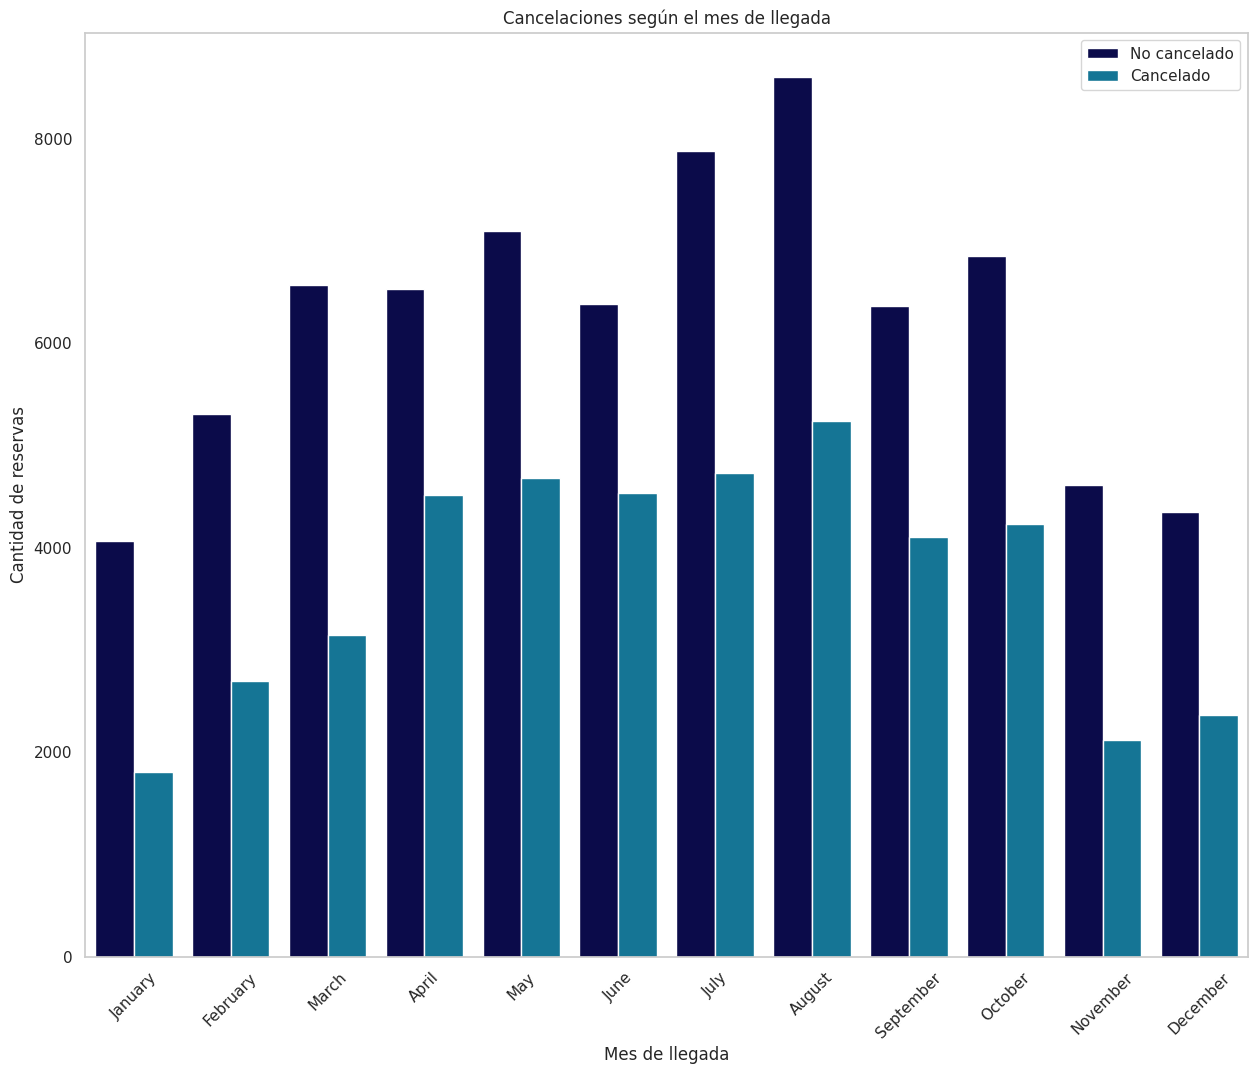

In [56]:
# Convertir la columna arrival_date_month en una categoría ordenada
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)

# Gráfico de barras para cancelaciones por mes de llegada
sns.countplot(x='arrival_date_month', hue='is_canceled', data=df, palette='ocean')
plt.title('Cancelaciones según el mes de llegada')
plt.xlabel('Mes de llegada')
plt.ylabel('Cantidad de reservas')
plt.legend(['No cancelado', 'Cancelado'])
plt.xticks(rotation=45)
plt.show()

**El mayor N de cancelaciones se da durante el mes de agosto.**

Análisis estadístico: Chi-cuadrado.

In [57]:
from scipy.stats import chi2_contingency

# Crear la tabla de contingencia
contingency_table = pd.crosstab(df['is_canceled'], df['arrival_date_month'])

# Realizar el test Chi-Cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Mostrar los resultados
print(f"Chi-cuadrado: {chi2}")
print(f"p-valor: {p}")
print(f"Grados de libertad: {dof}")
print(f"Frecuencias esperadas:\n{expected}")


Chi-cuadrado: 555.6069141309815
p-valor: 4.330327397308761e-112
Grados de libertad: 11
Frecuencias esperadas:
[[3685.2843859  5024.07419605 6101.51414181 6934.56683456 7392.55734212
  6858.54920573 7922.7960093  8692.39597055 6570.81305695 6962.20960868
  4228.71619527 4215.52305308]
 [2180.7156141  2972.92580395 3610.48585819 4103.43316544 4374.44265788
  4058.45079427 4688.2039907  5143.60402945 3888.18694305 4119.79039132
  2502.28380473 2494.47694692]]


**El p-valor extremadamente bajo sugieren que los meses del año tienen un efecto considerable en la probabilidad de cancelación de reservas. Es probable que algunos meses tengan tasas de cancelación significativamente más altas o más bajas en comparación con otros.**

In [58]:
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Crear la tabla de contingencia
contingency_table = pd.crosstab(df['arrival_date_month'], df['is_canceled'])

# Calcular la tasa de cancelación por mes
# Filas son los meses, columnas son las categorías de is_canceled (0 = no cancelado, 1 = cancelado)
cancelation_rate = contingency_table[1] / contingency_table.sum(axis=1)

# Reindexar la tasa de cancelación utilizando el orden deseado de meses
cancelation_rate = cancelation_rate.reindex(months_order)

# Mostrar las tasas de cancelación por mes
print(cancelation_rate)


arrival_date_month
January      0.307705
February     0.336751
March        0.323929
April        0.408589
May          0.397467
June         0.415224
July         0.375149
August       0.378144
September    0.391911
October      0.381520
November     0.314961
December     0.352161
dtype: float64


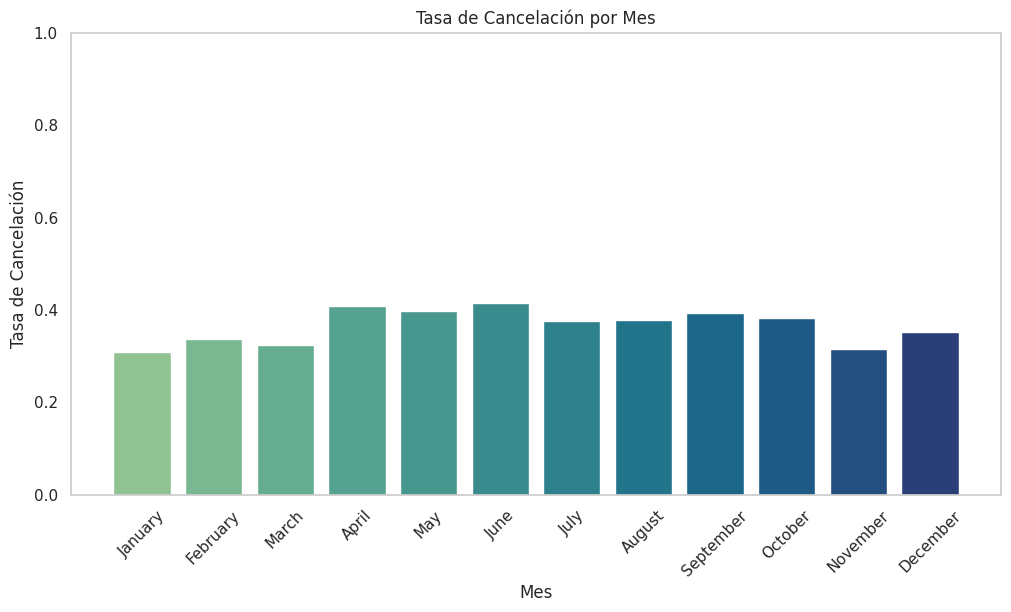

In [59]:
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
cancelation_rate = cancelation_rate.reindex(months_order)

# Creamos un gráfico de barras para las tasas de cancelación por mes
plt.figure(figsize=(12, 6))
palette = sns.color_palette("crest", n_colors=len(cancelation_rate))
plt.bar(cancelation_rate.index, cancelation_rate.values, color=palette)
plt.xlabel('Mes')
plt.ylabel('Tasa de Cancelación')
plt.title('Tasa de Cancelación por Mes')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Ajustar el límite del eje y para que sea de 0 a 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Junio (41.5%) y Abril (40.8%) tienen las tasas de cancelación más altas. Esto podría indicar que los clientes tienden a cancelar más sus reservas en estos meses.**

**Se recomienda:**

**-Investigar por qué esto podría estar ocurriendo, como eventos estacionales, o condiciones meteorológicas.**

**-Implementar políticas de cancelación más estrictas, o incentivos para fomentar la retención de las reservas en estos meses. También se podrían ofrecer promociones para asegurar que los clientes mantengan sus reservas durante estos meses.**

## ¿Qué impacto tiene el lead time (tiempo de antelación de la reserva) en la probabilidad de cancelación?

*Hipótesis: A mayor lead time, mayor es la probabilidad de cancelación.*

**LEAD TIME VS CANCELACIONES:**

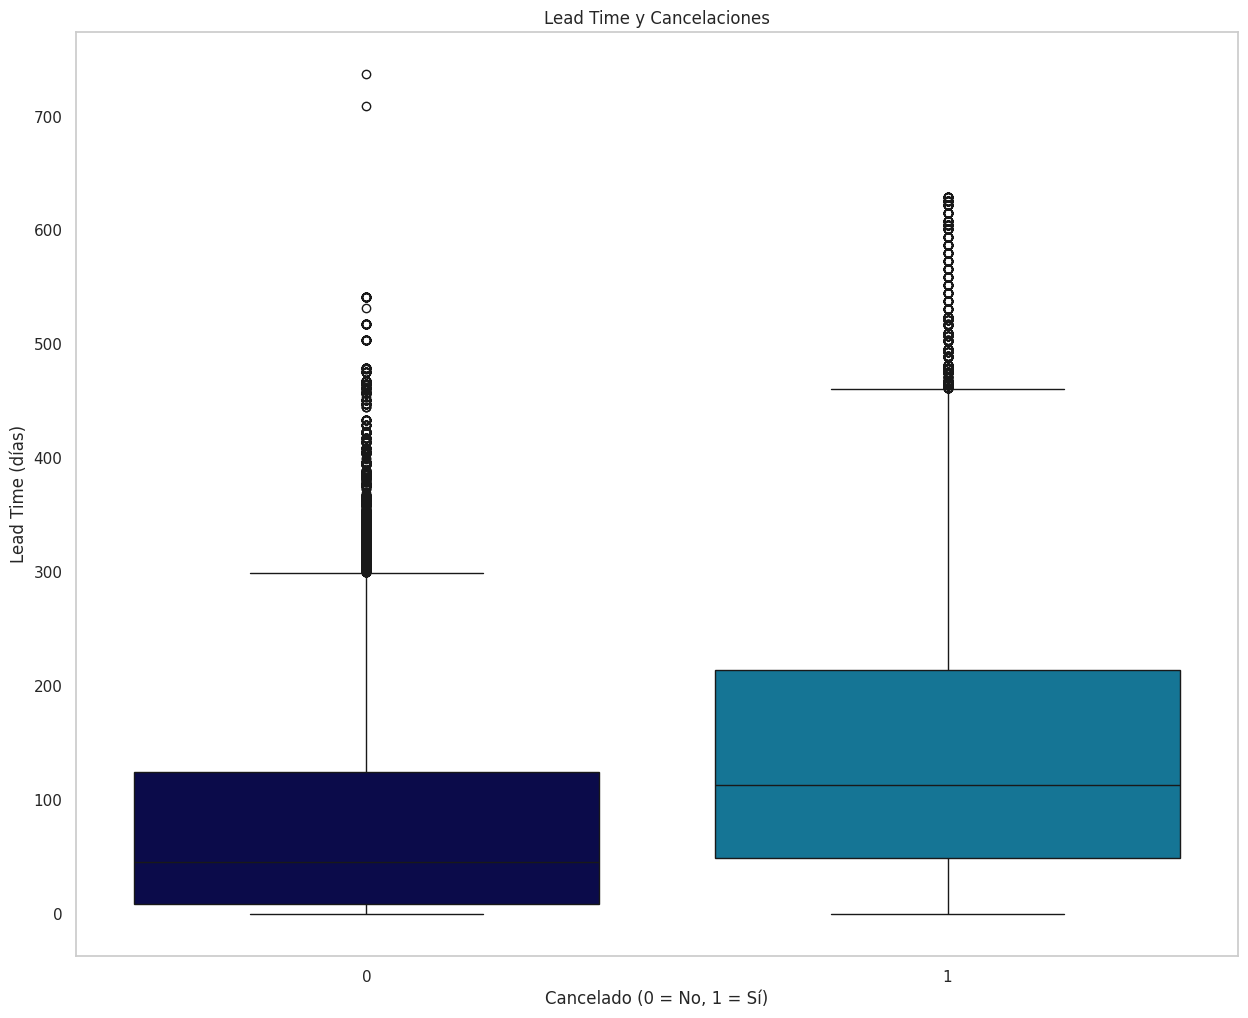

In [60]:
# Gráfico de boxplot para comparar el lead time y las cancelaciones
sns.boxplot(x='is_canceled', y='lead_time', data=df, palette='ocean')
plt.title('Lead Time y Cancelaciones')
plt.xlabel('Cancelado (0 = No, 1 = Sí)')
plt.ylabel('Lead Time (días)')
plt.show()

**El mayor número de cancelaciones se da cuando mayor es el tiempo de antelación con el que se hacen las reservas. Quizás sea porque hay mayor tiempo para pensar y arrepentirse del viaje.**

**RELACIÓN ENTRE EL TIPO DE CLIENTE, LEAD TIME Y CANCELACIONES:**

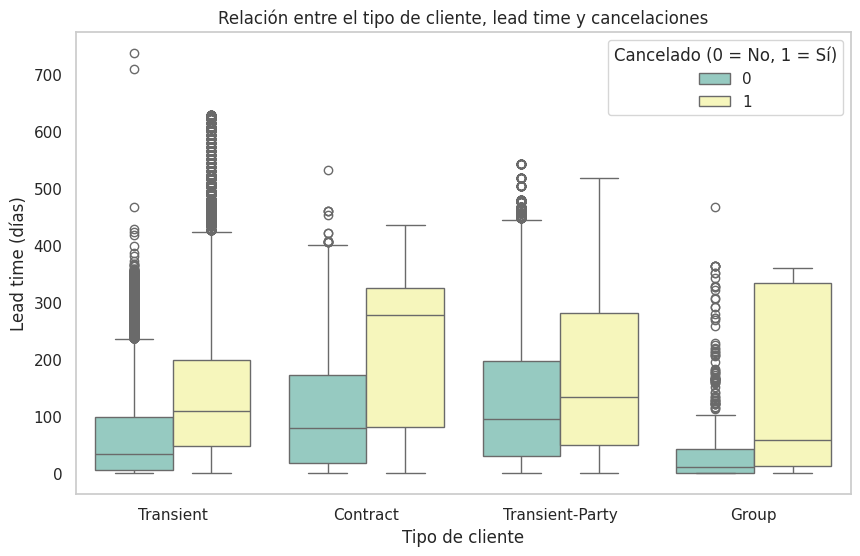

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de caja (boxplot) para analizar la relación entre estas tres variables
plt.figure(figsize=(10, 6))
sns.boxplot(x='customer_type', y='lead_time', hue='is_canceled', data=df, palette='Set3')
plt.title('Relación entre el tipo de cliente, lead time y cancelaciones')
plt.xlabel('Tipo de cliente')
plt.ylabel('Lead time (días)')
plt.legend(title='Cancelado (0 = No, 1 = Sí)')
plt.show()

Considerando las preguntas que quiero responder, hago el siguiente pairplot:

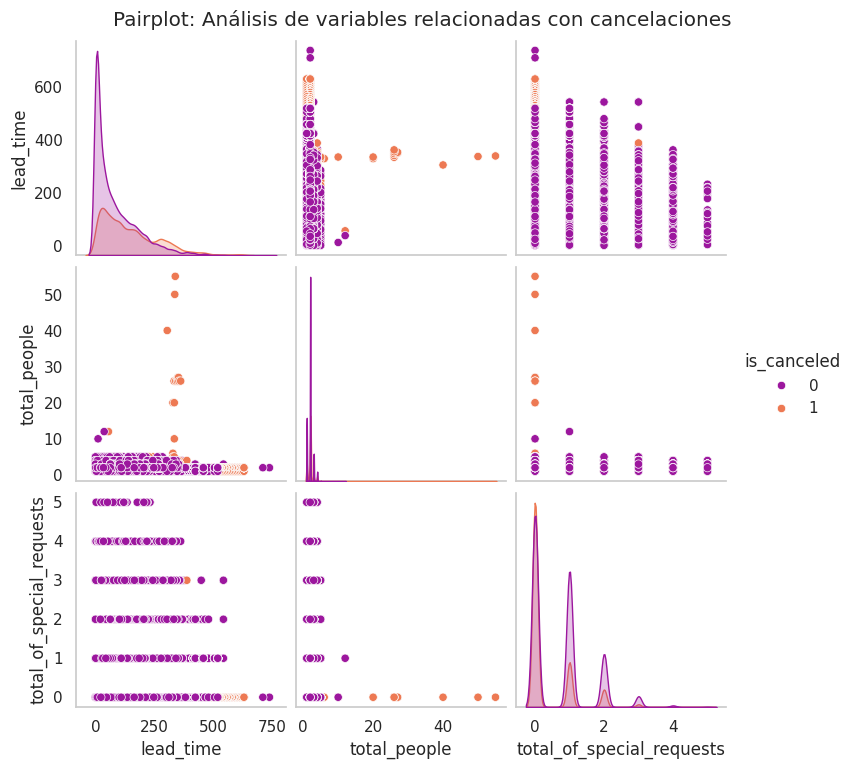

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtramos las variables que queremos analizar
subset = df[['lead_time', 'total_people', 'total_of_special_requests', 'distribution_channel', 'customer_type', 'hotel', 'is_canceled']]

# Creamos el pairplot
sns.pairplot(subset, hue='is_canceled', palette='plasma')
plt.suptitle('Pairplot: Análisis de variables relacionadas con cancelaciones', y=1.02)
plt.show()


In [65]:
# Calculamos la matriz de correlación sólo para las columnas numéricas

numerical_subset = subset[['lead_time', 'total_people', 'total_of_special_requests', 'is_canceled']] # Select only numerical columns
correlation_matrix = numerical_subset.corr()

# Mostramos la matriz de correlación
print(correlation_matrix)



                           lead_time  total_people  total_of_special_requests  \
lead_time                   1.000000      0.067658                  -0.096721   
total_people                0.067658      1.000000                   0.156627   
total_of_special_requests  -0.096721      0.156627                   1.000000   
is_canceled                 0.291607      0.042983                  -0.235923   

                           is_canceled  
lead_time                     0.291607  
total_people                  0.042983  
total_of_special_requests    -0.235923  
is_canceled                   1.000000  


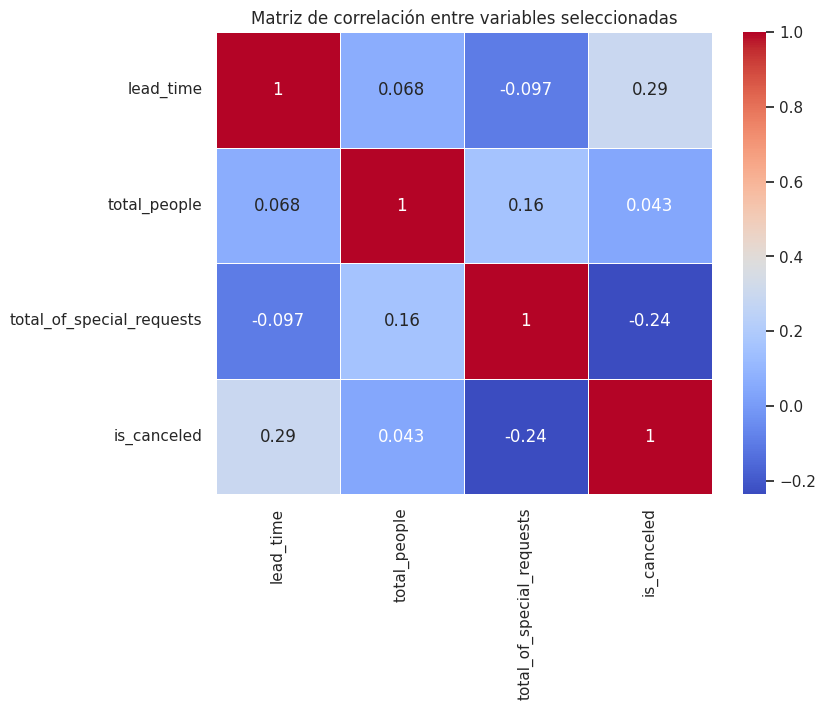

In [66]:
# Creamos un heatmap para visualizar la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de correlación entre variables seleccionadas')
plt.show()

**Entre los valores obtenidos, se puede observar que la correlación más alta es entre el "lead_time" (es decir, el tiempo entre la reserva y la llegada) vs "is_canceled": 0.29. Esto sugiere que cuanto mayor tiempo entre la reserva y la fecha de llegada, mayor es la probabilidad de que la reserva sea cancelada.**

# **INSIGHTS Y RECOMENDACIONES FINALES**

**Considerando que los clientes transitorios son los que más cancelan, se recomiendan estrategias de fidelización de los clientes.**



**Considerando que la tasa de cancelación aumenta con el lead time, se recomiendan:**

**i. Políticas de cancelación más estrictas (ej. depósitos no reembolsables)
Incentivos (ej. descuentos).**

**ii. Flexibilidad en la reprogramación (ej. poder cambiar de fecha en vez de cancelar.**


**Considerando que la tasa de cancelación es mayor durante ciertos meses del año, se recomiendan:**

**iii. Ofrecer paquetes y promociones para estos meses.**

**iv. Políticas de cancelación más estrictas.**

# **ANÁLISIS DEL MODELO DE PREDICCIÓN: Modelo de regresión logística**

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118726 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118726 non-null  object        
 1   is_canceled                     118726 non-null  int64         
 2   lead_time                       118726 non-null  int64         
 3   arrival_date_year               118726 non-null  int64         
 4   arrival_date_month              118726 non-null  category      
 5   arrival_date_week_number        118726 non-null  int64         
 6   arrival_date_day_of_month       118726 non-null  int64         
 7   stays_in_weekend_nights         118726 non-null  int64         
 8   stays_in_week_nights            118726 non-null  int64         
 9   adults                          118726 non-null  int64         
 10  children                        118726 non-null  float64     

In [69]:
#La variable arrival_date está en formato datetime y no aportará a nuestro modelo, por lo cual la eliminamos
col_del=['arrival_date']
df=df.drop(labels=col_del, axis=1)
df.columns # Verifico las columnas que quedaron

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'precio_por_persona', 'total_huespedes', 'month', 'year',
       'total_people'],
      dtype='object')

In [70]:
#Enlistemos las de tipo 'object'
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
print("Columnas categóricas:", categorical_features)

Columnas categóricas: ['hotel', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type']


In [71]:
#Veamos cuántas categorías tiene cada variable
df.select_dtypes(include=['object', 'category']).nunique()

,0
hotel,2
arrival_date_month,12
meal,5
country,177
market_segment,7
distribution_channel,5
reserved_room_type,9
assigned_room_type,11
deposit_type,3
customer_type,4


In [72]:
### 1. Codificación del Mes (arrival_date_month)
df['arrival_date_month'] = df['arrival_date_month'].map({
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
})

In [73]:
### 2. One-Hot Encoding para variables sin orden
categorical_columns = ['hotel', 'meal', 'market_segment',
                       'distribution_channel', 'deposit_type', 'customer_type']

df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [74]:
### 3. Label Encoding para 'country'
label_encoder = LabelEncoder()
df['country'] = label_encoder.fit_transform(df['country'])

In [75]:
### 4. Label Encoding para tipos de habitación
df['reserved_room_type'] = label_encoder.fit_transform(df['reserved_room_type'])
df['assigned_room_type'] = label_encoder.fit_transform(df['assigned_room_type'])


In [76]:
# Separamos las características de prueba (X) y la variable objetivo (y)

X = df.drop(columns=['is_canceled'])  # Excluimos la columna objetivo
y = df['is_canceled']  # Variable objetivo

# Dividimos el conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión logística
model = LogisticRegression(max_iter=1000, solver='liblinear')  # Aumentamos max_iter para asegurar convergencia
model.fit(X_train, y_train)

# Hacemos predicciones en el conjunto de prueba
y_pred = model.predict(X_test)



## **Métricas de evaluación para nuestro modelo logístico de clasificación.**

In [77]:
# Matriz de confusión
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(confusion_matrix)

# Informe de clasificación
print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred))

# Exactitud del modelo
accuracy = accuracy_score(y_test, y_pred)
print("\nExactitud del modelo:", accuracy)

Matriz de Confusión:
[[13571  1267]
 [ 3464  5444]]

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85     14838
           1       0.81      0.61      0.70      8908

    accuracy                           0.80     23746
   macro avg       0.80      0.76      0.77     23746
weighted avg       0.80      0.80      0.79     23746


Exactitud del modelo: 0.8007664448749263


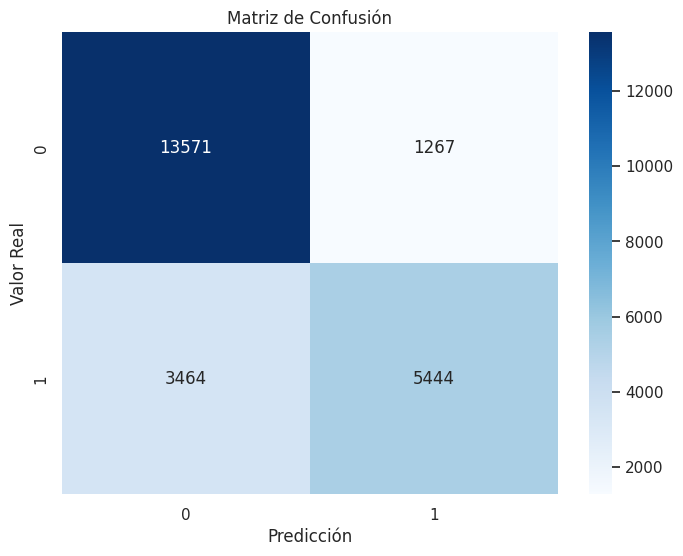

In [78]:
# Visualizamos la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

**Interpretación de los resultados:**

**Los resultados fueron buenos. De todas las reservas predichas como "canceladas", el 81% fue correctamente predicha (Precisión clase 1=0.81). Sin embargo, sólo el 61% de las cancelaciones reales fueron detectadas por el modelo (Recall clase 1=0.61). El accurancy fue del 80%, lo cual es bueno pero considerando el recall mencionado previamente, se podrían estar perdiendo cancelaciones importantes y significativas.**

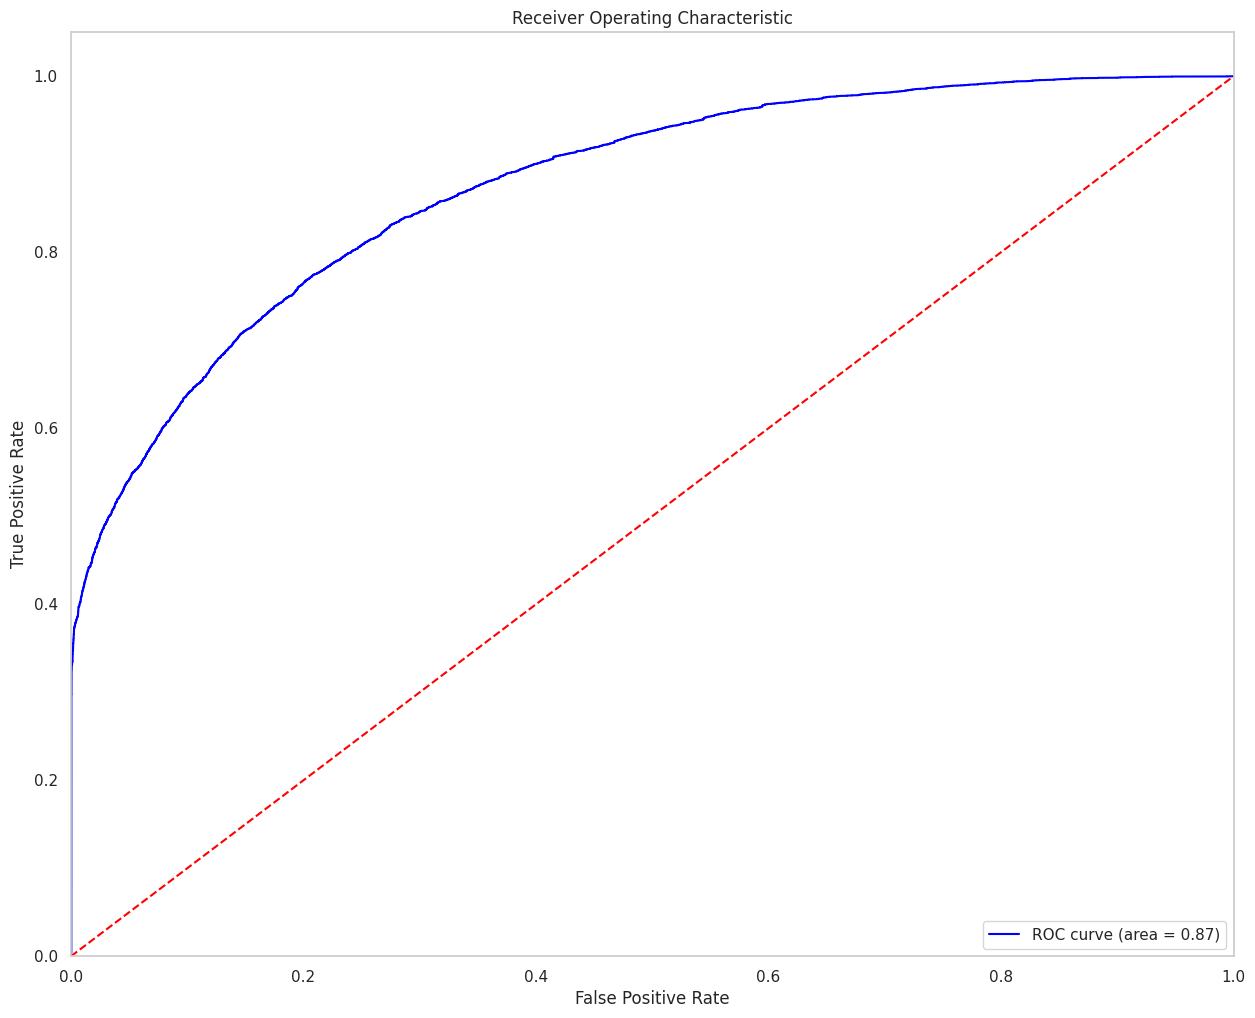

In [79]:
#Graficamos la curva ROC y calculamos el AUC (Área Bajo la Curva) para evaluar la capacidad del modelo para diferenciar entre las clases.

# Predecimos las probabilidades
y_probs = model.predict_proba(X_test)[:, 1]

# Calculamos la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Graficamos la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**Con un AUC de 0.87, el modelo tiene una buena capacidad de diferenciar entre las reservas que serán canceladas y las que no lo serán.**

## **Validación del modelo logístico**

In [80]:
from sklearn.model_selection import cross_val_score

# Validación cruzada con 5 particiones
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Puntuaciones de validación cruzada:", scores)
print("Promedio de validación cruzada:", scores.mean())

Puntuaciones de validación cruzada: [0.69641203 0.70507475 0.76534007 0.69353548 0.69395662]
Promedio de validación cruzada: 0.710863791012615


## **Optimización: ajuste de hiperparámetros**

In [81]:
from sklearn.model_selection import GridSearchCV

# Definimos el modelo
model = LogisticRegression(max_iter=1000)

# Definimos los parámetros a ajustar (reducir el número de combinaciones)
param_grid = {
    'C': [0.1, 1, 10],  # Solo tres valores para 'C'
    'solver': ['liblinear', 'lbfgs']  # Solo dos solvers
}

# Configuramos la búsqueda en cuadrícula con menos pliegues
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='accuracy', cv=3, n_jobs=-1, verbose=1)

# Ajustamos el modelo
grid_search.fit(X_train, y_train)

# Resultados del mejor modelo
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor precisión:", grid_search.best_score_)


Fitting 3 folds for each of 6 candidates, totalling 18 fits
Mejores hiperparámetros: {'C': 10, 'solver': 'liblinear'}
Mejor precisión: 0.8041798273320699


# **MODELO DE PREDICCIÓN ALTERNATIVO: Random Forest.**

In [82]:
# Dividimos el conjunto de datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos y entrenamos el modelo
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Hacemos predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)



## **Métricas de evaluación para nuestro modelo de clasificación de Random Forest.**

In [84]:
# Calculamos precisión
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print("Precisión en el conjunto de prueba:", accuracy)

# Generar el informe de clasificación
print("Informe de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(cm)

Precisión en el conjunto de prueba: 0.8872652236166091
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     14838
           1       0.88      0.81      0.84      8908

    accuracy                           0.89     23746
   macro avg       0.89      0.87      0.88     23746
weighted avg       0.89      0.89      0.89     23746

Matriz de confusión:
[[13895   943]
 [ 1734  7174]]


AUC: 0.9536784164652549


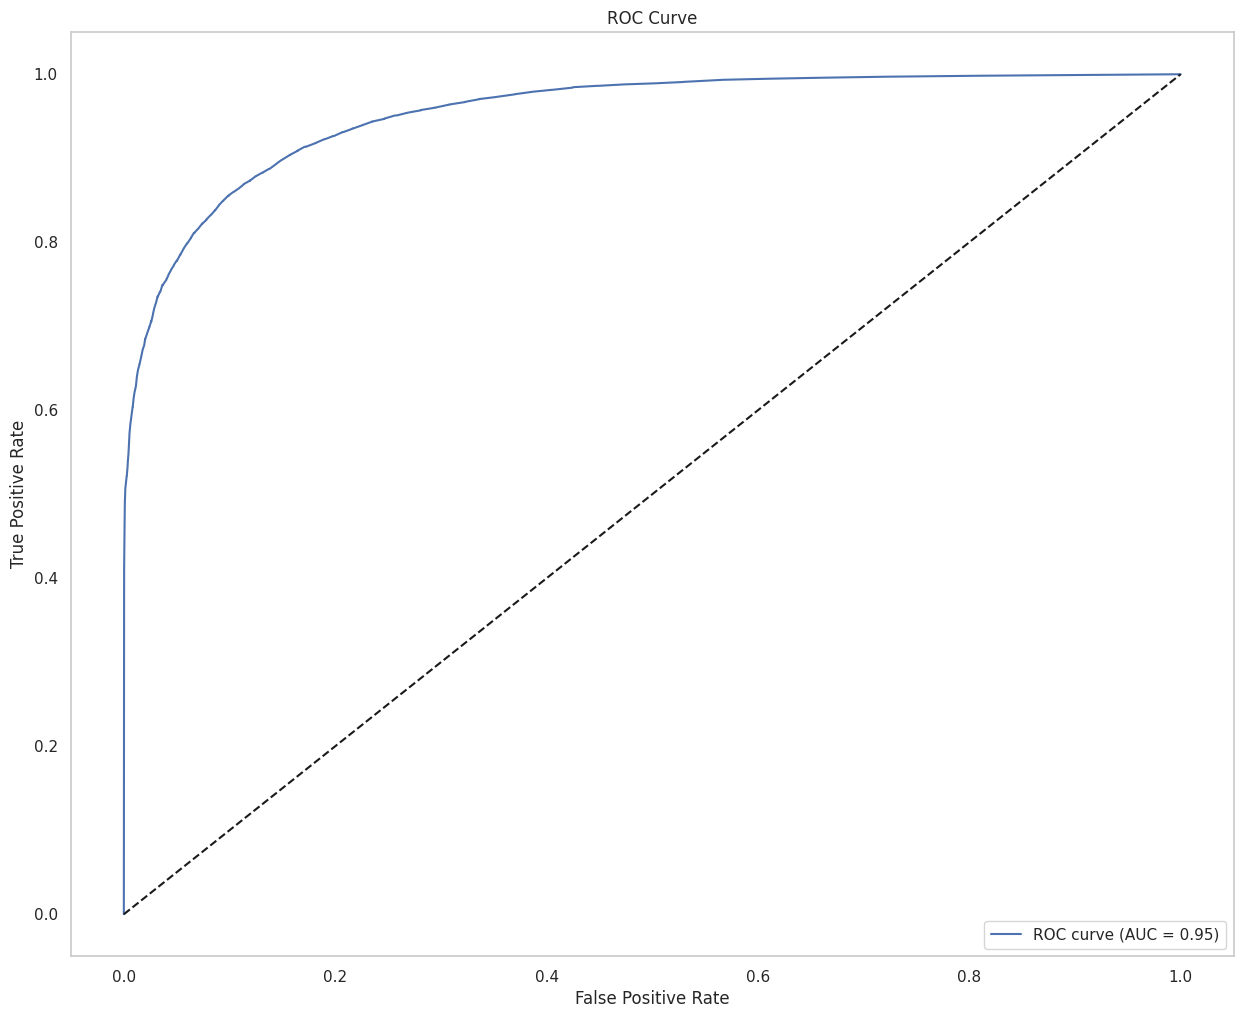

In [85]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Obtener las probabilidades para la clase positiva
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Calcular la AUC
auc = roc_auc_score(y_test, y_prob)
print("AUC:", auc)

# Dibujar la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal de referencia
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

**Interpretación de los resultados:**

**Los resultados fueron mejores respecto a los obtenidos con el modelo de regresión logística. Con el modelo de Random Forest, de todas las reservas predichas como "canceladas", el 88% fue correctamente predicha (Precisión clase 1=0.88), mientras que el 81% de las cancelaciones reales fueron detectadas por el modelo (Recall clase 1=0.81). El accurancy fue del 89%, siendo las 3 métricas mencionadas previamente superiores a las del modelo logístico.**


## **Validación del modelo de Random Forest**

In [86]:
# Evaluar el modelo utilizando validación cruzada
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)

# Resultados de la validación cruzada
print("Puntuaciones de validación cruzada:", cv_scores)
print("Promedio de validación cruzada:", cv_scores.mean())

Puntuaciones de validación cruzada: [0.88260686 0.88571278 0.88629185 0.88629185 0.88218572]
Promedio de validación cruzada: 0.8846178142766898


**La precisión promedio fue de 88.46% lo cual indica una mejora respecto al modelo de regresión logística. Además, las puntuaciones de validación cruzada fueron consistentes, lo que sugiere que el modelo tiene un buen rendimiento y no está sobreajustado.A partir de estos resultados, se decide seleccionar el modelo de Random Forest como mejor modelo predictivo.**

## **Optimización: ajuste de hiperparámetros.**

In [87]:
from sklearn.model_selection import RandomizedSearchCV

# Definir el espacio de búsqueda de hiperparámetros
param_dist = {
    'n_estimators': [50],  # Puedes reducir esta lista si es necesario
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

# Configurar la búsqueda aleatoria
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist,
                                   n_iter=10, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

# Ajustar el modelo
random_search.fit(X_train, y_train)

# Resultados del mejor modelo
print("Mejores hiperparámetros:", random_search.best_params_)
print("Mejor precisión en validación cruzada:", random_search.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Mejores hiperparámetros: {'n_estimators': 50, 'min_samples_split': 5, 'max_depth': None}
Mejor precisión en validación cruzada: 0.8831227626868813


**El ajuste de hiperparámetros no mejora significativamente el rendimiento del modelo, lo que podría deberse a que el modelo se encuentra en el límite de su máximo rendimiento.**

# **CONCLUSIONES FINALES**

**El presente proyecto tuvo como objetivo principal desarrollar un modelo predictivo para identificar las reservas hoteleras con mayor probabilidad de ser canceladas.**

**Se identificaron algunos patrones importantes, como la influencia del tipo de cliente, el N de clientes, el tipo de hotel y la estacionalidad, aunque estas últimas dos tuvieron una significancia relativamente baja.**

**Se probaron 2 algoritmos diferentes: Regresión Logística y Random Forest, para evaluar su capacidad de predicción.**

**Finalmente, se eligió el modelo de Random Forest por sus mejores métricas.**

**Se realizó un ajuste de los hiperparámetros mediante validación cruzada. El modelo alcanzó una precisión promedio del 88.52% en validación cruzada, demostrando un rendimiento robusto y consistente.**

**En el conjunto de prueba, el modelo de Random Forest mostró un desempeño sólido, con una alta precisión y una AUC-ROC superior a 0.88, lo que indica una buena capacidad para distinguir entre reservas canceladas y no canceladas.**

**Aunque el modelo muestra un buen rendimiento, podrían explorarse más variables que no están presentes en el dataset, como factores económicos, presencia de feriados o eventos locales.**

**Además, sería interesante probar con otros modelos más avanzados como XGBoost o implementar técnicas de ensembling para mejorar aún más la capacidad predictiva.**

**En resumen, este proyecto permitió demostrar cómo el uso de modelos predictivos, como el modelo logístico o de Random Forest constituyen herramientas efectivas para abordar el problema de las cancelaciones hoteleras. Los resultados obtenidos permiten no solo predecir cancelaciones  sino también identificar patrones que pueden orientar la toma de decisiones estratégicas para mitigar su impacto. El modelo desarrollado constituye una base sólida para futuras mejoras y puede integrarse en sistemas operativos del hotel para optimizar la gestión de reservas.**